In [137]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import seaborn as sns
from scipy import linalg
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
from scipy.special import comb

In [2]:
gene_rpkm=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

(1680, 24057)

In [ ]:
gene_rpkm=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\genes_rpkm.csv")
gene_rpkm=gene_rpkm.transpose()
gene_rpkm.shape

In [3]:
new_header = gene_rpkm.iloc[0]
gene_rpkm = gene_rpkm[1:]
gene_rpkm.columns = new_header
gene_rpkm

Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101401,0,76.13,0.05,0,0,0,0,0,0,0.09,...,0,0,0,0,0,0,0,1401.76,242.94,242.94
A01101402,0,512.73,10.11,0,0,146.61,0,0,0,0,...,0,0,0,0,0,0,0,1397.16,539.54,539.54
A01101403,0,172.75,0,0,0,23.65,0,0,0,72.72,...,0,0,0,0,0,0,0,332.88,341.45,341.45
A01101404,0,170.56,0.02,0,0,117.6,0,0,0,125.81,...,0,0,0,0,0,0,0,1442.66,260.02,260.02
A01101405,0,113.87,0.04,0,0,180.93,0,0,0,0.1,...,0,0,0,0,0,0,0,749.68,348.1,348.1
A01101406,0,10.9,0.06,0,0,219.01,1.63,0,0,0.1,...,0,0,0,0,0,0,0,729.64,458.86,458.86
A01101407,0,191.23,70.19,0,0.53,134.03,6.35,0,0,200.77,...,0,0,0,0,0,0,0,746.42,336.74,336.74
A01101408,0,67.41,1.82,0,0,118.29,0,0,0,68.43,...,0,0,0,0,0,0,0,799.18,447.15,447.15
A02271433,0,70.56,0,0,0,60.55,0,0,0,0,...,0,0,0,0,0,0,0,1363.71,524.27,524.27
A02271434,0,73.35,20.88,0,0,122.69,46.68,0,0,177.3,...,0,0,0,0,0,0,0,1138.54,723.63,723.63


In [ ]:
cellmeta=pd.read_csv(r"C:\Users\austi\Documents\GitHub\DataScienceBME6900Project\alan brain atlas data\mouse visual cortex cellular taxonomy\cell_metadata.csv")
cellmeta.shape

In [4]:
cellmeta=pd.read_csv("/Users/markomiholjcic/Documents/GitHub/DataScienceBME6900Project/alan brain atlas data/mouse visual cortex cellular taxonomy/cell_metadata.csv")
cellmeta.shape

(1679, 16)

In [5]:
excitatory_meta=cellmeta.loc[cellmeta['major_class']=='Excitatory']
Excitatory_cells=excitatory_meta['long_name']
inhib_meta = cellmeta.loc[cellmeta['major_class']=='Inhibitory']
inhib_cells = inhib_meta['long_name']

In [6]:
inhib_cells.shape

(761,)

In [7]:
excitatory_gene_rpkm=gene_rpkm.loc[Excitatory_cells]
inhib_meta_rpkm = gene_rpkm.loc[inhib_cells]

df = pd.DataFrame()

df = df.append(excitatory_gene_rpkm)
df = df.append(inhib_meta_rpkm)

df


Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101403,0,172.75,0,0,0,23.65,0,0,0,72.72,...,0,0,0,0,0,0,0,332.88,341.45,341.45
A01101406,0,10.9,0.06,0,0,219.01,1.63,0,0,0.1,...,0,0,0,0,0,0,0,729.64,458.86,458.86
A01101407,0,191.23,70.19,0,0.53,134.03,6.35,0,0,200.77,...,0,0,0,0,0,0,0,746.42,336.74,336.74
A01101408,0,67.41,1.82,0,0,118.29,0,0,0,68.43,...,0,0,0,0,0,0,0,799.18,447.15,447.15
A02271433,0,70.56,0,0,0,60.55,0,0,0,0,...,0,0,0,0,0,0,0,1363.71,524.27,524.27
A02271434,0,73.35,20.88,0,0,122.69,46.68,0,0,177.3,...,0,0,0,0,0,0,0,1138.54,723.63,723.63
A02271436,0,6.16,10.12,0,0,156.62,0,0,0,8.76,...,0,0,0,0,0,0,0,886.58,755.7,755.7
A02271438,0,54.48,8.29,0,7.12,150.47,0.29,0,0,137.61,...,0,0,0,0,0,0,0,473.58,291.19,291.19
A12101407,0,0,80.74,0,0,0.51,0,0,0,0,...,0,0,0,0,0,0,0,455.33,356.9,356.9
A12101411,0,0,108.55,0,0,0,0,0,0,177.42,...,0,0,0,0,0,0,0,1988.22,1020.84,1020.84


In [8]:
excitatory_gene_rpkm = excitatory_gene_rpkm.apply(pd.to_numeric)
inhib_meta_rpkm = inhib_meta_rpkm.apply(pd.to_numeric)

df_numeric = df.apply(pd.to_numeric)

In [9]:
excitatory_gene_rpkm_matrix = excitatory_gene_rpkm.to_numpy()
inhib_meta_rpkm = inhib_meta_rpkm.to_numpy()

df_numpy = df_numeric.to_numpy()

In [10]:
df_numpy.shape

(1517, 24057)

In [15]:
#excitatory_gene_rpkm_matrix.dtype
#excitatory_gene_rpkm_matrix = np.transpose(excitatory_gene_rpkm_matrix)
#excitatory_gene_rpkm_matrix.shape

df_numpy = np.transpose(df_numpy)
df_numpy.shape

(24057, 1517)

In [ ]:
#preprocessing (dividing by the mean for each column)
#rows = excitatory_gene_rpkm_matrix.shape[1]
#
#means = np.arange(rows)
#
#for i in range(rows):
#    average = excitatory_gene_rpkm_matrix[:,i].mean()
#    means[i] = average
#    excitatory_gene_rpkm_matrix[:,i] = excitatory_gene_rpkm_matrix[:,i]/means[i]
#    
#excitatory_gene_rpkm_matrix

In [ ]:
#preprocessing (centering the data with the mean for each column)
#rows = excitatory_gene_rpkm_matrix.shape[1]
#
#means = np.arange(rows)
#
#for i in range(rows):
#    average = excitatory_gene_rpkm_matrix[:,i].mean()
#    means[i] = average
#    excitatory_gene_rpkm_matrix[:,i] = excitatory_gene_rpkm_matrix[:,i]-means[i]
#    
#excitatory_gene_rpkm_matrix

In [21]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

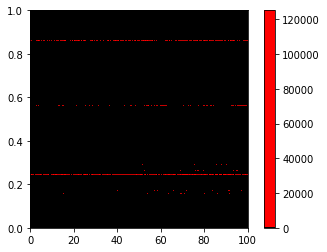

In [22]:
img = plt.imshow(df_numpy, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [23]:
#SVD
#U, s, VT = svd(excitatory_gene_rpkm_matrix)
U, s, vT = svd(df_numpy)

count = 0 

for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

#rank = xcitatory_gene_rpkm_matrix.shape[1] - count
rank = df_numpy.shape[1] - count
rank

1517

In [ ]:
U.shape

In [ ]:
test = U.dot(np.transpose(U))

identity_matrix = np.identity(len(U[:,1]))

np.allclose(test, identity_matrix, atol=1e-8)

In [ ]:
vT.shape

In [ ]:
test = vT.dot(np.transpose(vT))

identity_matrix = np.identity(len(vT[:,1]))

np.allclose(test, identity_matrix, atol=1e-08)

In [25]:
#U, s, VT = svd(excitatory_gene_rpkm_matrix)
U, s, vT = svd(df_numpy)

U = U[:, :rank]

sigma = diag(s)

sigma = sigma[:rank, :rank]
VT = vT[:rank, :]

In [ ]:
U.shape

In [ ]:
sigma.shape

In [ ]:
VT.shape

In [ ]:
uDotS = U.dot(sigma)
uDotSDotVt = uDotS.dot(VT)

testSVD = np.round(abs(excitatory_gene_rpkm_matrix - uDotSDotVt))
testSVD = np.matrix(testSVD)
if (testSVD.all() == 0):
    zero = True
zero

In [ ]:
print(np.max(U))
print(np.min(U))
print(np.mean(U))

In [ ]:
gBR = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
gBRmap = LinearSegmentedColormap.from_list("mycmap", gBR)

In [ ]:
img = plt.imshow(U, cmap=gBRmap, extent=[0,100,0,1], aspect=100)

plt.title("U")
plt.colorbar(img, cmap=gBRmap)

In [ ]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

In [ ]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

In [ ]:
print(np.min(VT))
print(np.max(VT))
print(np.mean(VT))

In [ ]:
rBr = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
sigmap = LinearSegmentedColormap.from_list("sigmap", rBr)

In [ ]:
plt.figure(figsize=(10,10))
img = plt.imshow(sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [ ]:
print(np.min(sigma))
print(np.max(sigma))
print(np.mean(sigma))

In [ ]:
diagonal = diag(sigma)

sort_diag = np.sort(diagonal)
sort_diag=sort_diag[::-1]

np.allclose(sort_diag, diagonal)

In [ ]:
sigma

In [ ]:
d_sig=diag(sigma)

count = 0
for m in range(len(d_sig)):
    if d_sig[m] < 7000:
        count = m
        break
        
sig=d_sig[:count]
denoise_sigma=np.diag(sig)
len(denoise_sigma)

In [ ]:
dns_U=U[:,:len(denoise_sigma)]
dns_VT=VT[:len(denoise_sigma),:]


In [ ]:
dns_uDotS = dns_U.dot(denoise_sigma)
dns_uDotSDotVt = dns_uDotS.dot(dns_VT)


In [ ]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

In [ ]:
img = plt.imshow(dns_uDotSDotVt, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [ ]:
plt.figure(figsize=(10,10))
img = plt.imshow(denoise_sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [ ]:
gBR3 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap3 = LinearSegmentedColormap.from_list("mycmap", gBR3)

In [ ]:
img = plt.imshow(dns_VT, cmap=gBRmap3, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap3)

In [ ]:
img = plt.imshow(dns_U, cmap=gBRmap, extent=[0,100,0,1], aspect=100)

plt.title("U")
plt.colorbar(img, cmap=gBRmap)

In [31]:
excitatory_meta=cellmeta.loc[cellmeta['major_class']=='Excitatory']

inhib_meta = cellmeta.loc[cellmeta['major_class']=='Inhibitory']

ex_in_meta = pd.DataFrame()

ex_in_meta = excitatory_meta.append(inhib_meta)

ex_in_meta
ex_index = excitatory_meta.index
ex_length = len(ex_index) - 1
print("Excitatory is from 0-", ex_length, "index")

inhib_index = inhib_meta.index
inhib_length = len(inhib_index)
inhib_max_index = ex_length + inhib_length
print("Inhibitatory is from:", ex_length+1, "-", inhib_max_index)

Excitatory is from 0- 755 index
Inhibitatory is from: 756 - 1516


In [33]:
ex_inhib_rpkm =gene_rpkm.loc[ex_in_meta["long_name"]]

ex_inhib_rpkm = ex_inhib_rpkm.apply(pd.to_numeric)

ex_inhib_rpkm = ex_inhib_rpkm.to_numpy()

ex_inhib_rpkm = np.transpose(ex_inhib_rpkm)
ex_inhib_rpkm.shape

(24057, 1517)

In [34]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

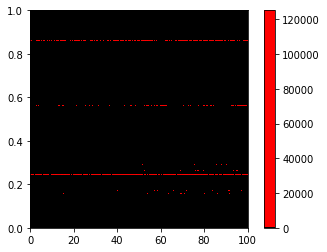

In [36]:
img = plt.imshow(ex_inhib_rpkm, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [38]:
#SVD
U, s, vT = svd(ex_inhib_rpkm)

count = 0 

for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

rank = ex_inhib_rpkm.shape[1] - count
rank

1517

In [39]:
U, s, VT = svd(ex_inhib_rpkm)

U = U[:, :rank]

sigma = diag(s)

sigma = sigma[:rank, :rank]
VT = VT[:rank, :]

In [44]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

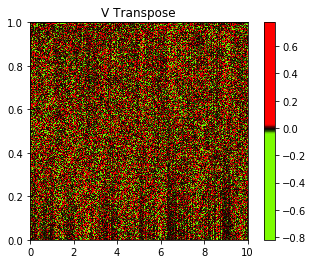

In [45]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

In [51]:
rBr = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
sigmap = LinearSegmentedColormap.from_list("sigmap", rBr)

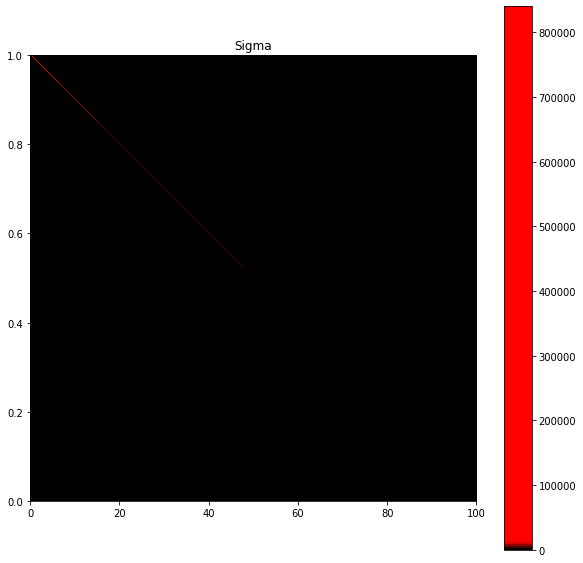

In [52]:
plt.figure(figsize=(10,10))
img = plt.imshow(sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [55]:
diag(sigma)[0:30]

array([840481.81529656, 574724.79119554, 208887.70235089, 168672.76217374,
       142648.16240761,  96654.57481659,  86317.89087098,  71810.34447491,
        59065.35802216,  54586.85569727,  50175.00339466,  44646.40666418,
        41663.46377079,  41035.85313976,  39436.89644634,  37168.75488687,
        36216.43053168,  32557.58901369,  31851.79439295,  31066.09135966,
        30003.36897968,  29018.3294261 ,  27154.30317036,  26366.11891417,
        25639.20191476,  25380.30229933,  23952.76829943,  23555.25837681,
        22464.13484282,  22339.86362579])

In [56]:
d_sig=diag(sigma)

count = 0
for m in range(len(d_sig)):
    if d_sig[m] < 41100:
        count = m
        break
        
sig=d_sig[:count]
denoise_sigma=np.diag(sig)
len(denoise_sigma)

13

In [57]:
dns_U=U[:,:len(denoise_sigma)]
dns_VT=VT[:len(denoise_sigma),:]

In [58]:
dns_uDotS = dns_U.dot(denoise_sigma)
dns_uDotSDotVt = dns_uDotS.dot(dns_VT)

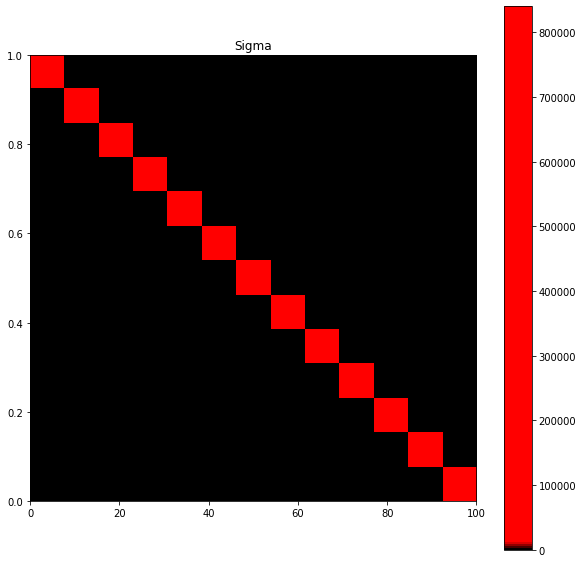

In [59]:
plt.figure(figsize=(10,10))
img = plt.imshow(denoise_sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [93]:
gBR3 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen', 'Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen', 'Lawngreen',
       'Black', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
gBRmap3 = LinearSegmentedColormap.from_list("mycmap", gBR3)

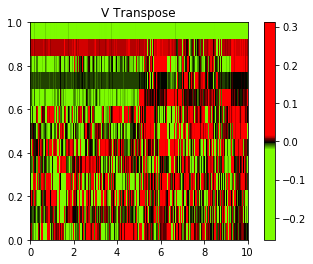

In [94]:
img = plt.imshow(dns_VT, cmap=gBRmap3, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap3)

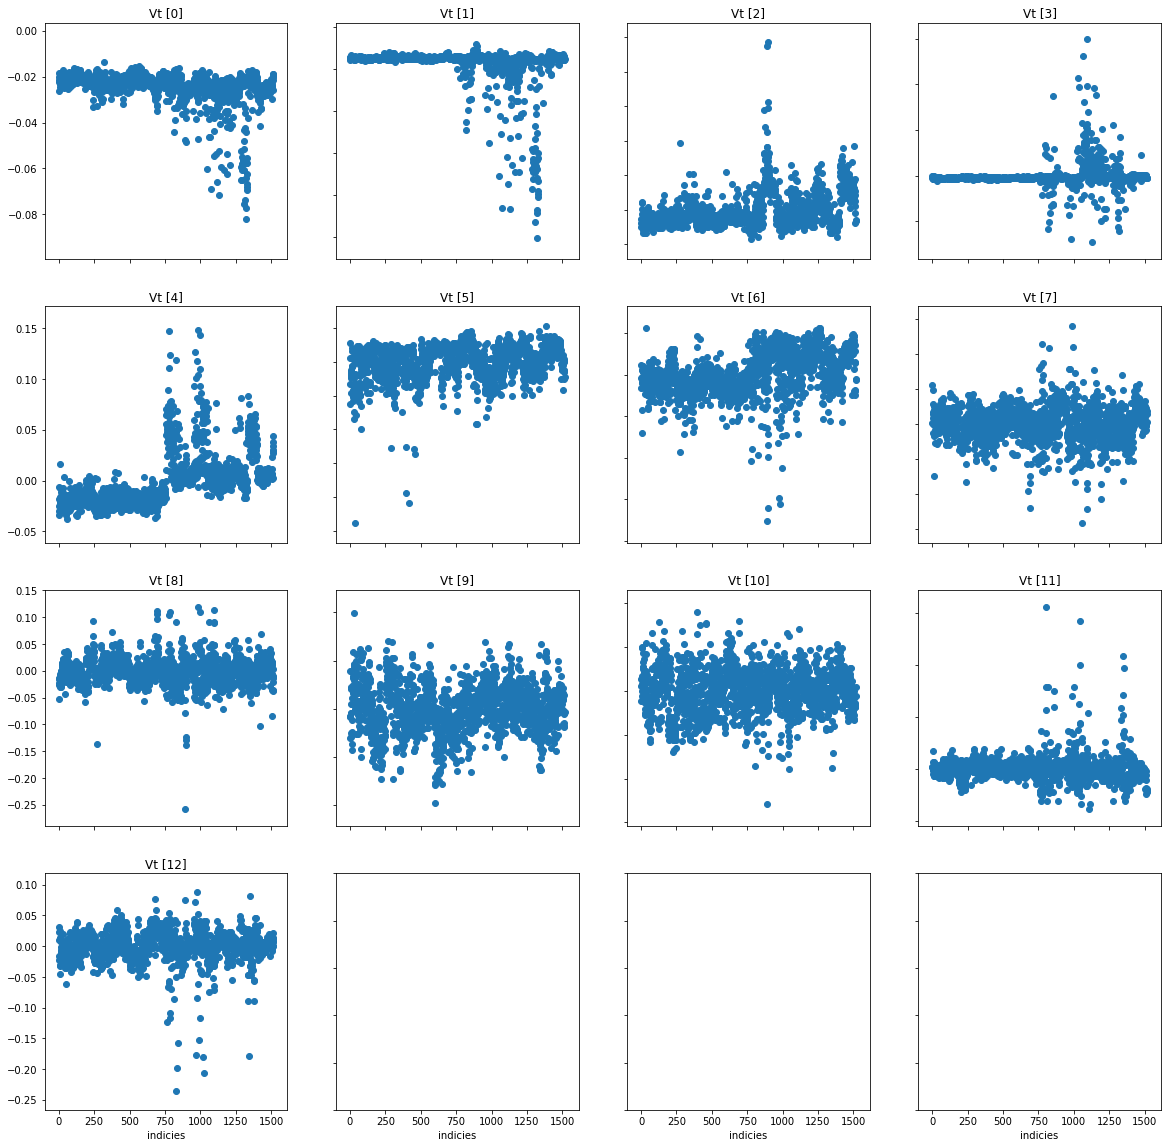

In [133]:
vx = np.arange(0,VT.shape[0],1)

fig, axs = plt.subplots(4, 4, figsize=(20,20), sharex='all')

for i in range(3):
    for k in range(4):
        axs[i, k].scatter(vx, dns_VT[(4*i)+k,:])
        num = str((4*i)+k)
        axs[i, k].set_title('Vt ['+num+']')

axs[3,0].scatter(vx, dns_VT[12,:])
axs[3,0].set_title('Vt [12]')

        #axs[0, 1].plot(x, y, 'tab:orange')
#axs[0, 1].set_title('Axis [0,1]')

#
for ax in axs.flat:
    ax.set(xlabel='indicies')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

In [135]:
v4 = dns_VT[4,:]

inhib = v4[0:755]
excit = v4[756:1516]

stats.mannwhitneyu(inhib,excit)

MannwhitneyuResult(statistic=8257.0, pvalue=3.210550053086477e-235)

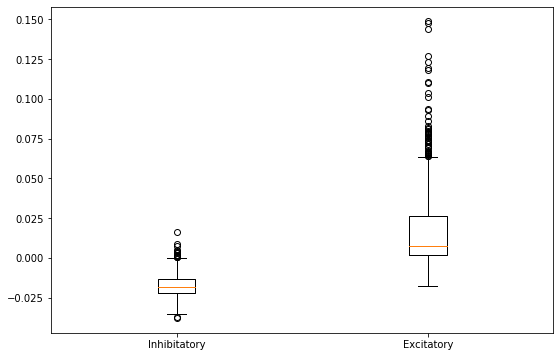

In [136]:
lists = [inhib,excit]

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(lists)

ax = ax.set_xticklabels(['Inhibitatory', 'Excitatory'])

In [146]:
v4 = dns_VT[4,:]

v4[750:770]

array([-0.01140295, -0.01572771, -0.01626381, -0.01180705, -0.00040903,
       -0.01732619,  0.0651158 ,  0.04530053,  0.05587785,  0.07027265,
        0.01000516,  0.05052478,  0.04772792,  0.02473189,  0.0665719 ,
        0.03776383,  0.05338516,  0.05598566,  0.04533445,  0.03199959])

In [167]:
N = len(dns_VT[4,:])
n = len(inhib)
K = 755
k = 755

summation =((comb(K,k)*comb(N-K,n-k))/(comb(N,n)))
    
summation = np.array(summation, dtype=np.longfloat)
summation

array(0., dtype=float128)

In [168]:
dns_U[:,4]

array([-5.27681099e-06,  3.63221503e-03,  3.63922802e-05, ...,
        5.53320743e-02,  8.33587657e-03,  8.33587657e-03])

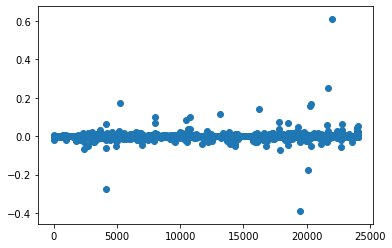

In [169]:
U4 = U[:,4]
Ux = np.arange(0,U.shape[0],1)
plt.scatter(Ux,U4)

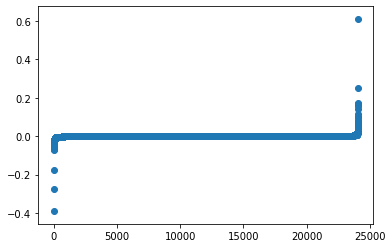

In [172]:
sorted_U4 = np.sort(U4)

plt.scatter(Ux,sorted_U4)

In [190]:
sorted_U4[-40:]

array([0.01928762, 0.01948528, 0.01971572, 0.01998607, 0.0200701 ,
       0.0214694 , 0.02241327, 0.02413581, 0.02489027, 0.02523241,
       0.02689212, 0.02697629, 0.02769322, 0.02833591, 0.02894144,
       0.03035621, 0.03431081, 0.03869854, 0.03914586, 0.03960826,
       0.04237273, 0.04403183, 0.04556722, 0.05533207, 0.05843654,
       0.06199011, 0.06427126, 0.06903242, 0.06960962, 0.07121518,
       0.08608006, 0.09743841, 0.09869907, 0.11654693, 0.14319647,
       0.15658408, 0.16728007, 0.17255648, 0.25167511, 0.61070055])

In [219]:
all_gene_rpkm = gene_rpkm.loc[ex_in_meta["long_name"]]

all_gene_rpkm = all_gene_rpkm.apply(pd.to_numeric)

all_gene_rpkm = all_gene_rpkm.to_numpy()

all_gene_rpkm = np.transpose(all_gene_rpkm)

In [217]:
dictionary = {}

for i in range(U4.shape[0]):
    dictionary[U4[i]] = all_gene_rpkm[i,:]
    
dictionary

{-5.276810987045306e-06: array([0., 0., 0., ..., 0., 0., 0.]),
 0.003632215025868841: array([1.7275e+02, 1.0900e+01, 1.9123e+02, ..., 1.5400e+00, 5.4000e-01,
        6.7919e+02]),
 3.639228019247136e-05: array([0.000e+00, 6.000e-02, 7.019e+01, ..., 1.170e+00, 7.650e+00,
        1.200e-01]),
 2.405243570169964e-05: array([0., 0., 0., ..., 0., 0., 0.]),
 1.5928597150498246e-05: array([ 0.  ,  0.  ,  0.53, ...,  0.  , 43.42,  0.  ]),
 0.0006377139729194038: array([ 23.65, 219.01, 134.03, ..., 219.92, 272.64, 436.88]),
 0.0005297860725598627: array([0.  , 1.63, 6.35, ..., 0.  , 0.  , 0.  ]),
 4.9055118475602684e-17: array([0., 0., 0., ..., 0., 0., 0.]),
 2.6966353981360013e-06: array([0., 0., 0., ..., 0., 0., 0.]),
 0.0006405423139581197: array([7.2720e+01, 1.0000e-01, 2.0077e+02, ..., 9.4380e+01, 7.8250e+01,
        2.0770e+01]),
 0.0024532700816396174: array([213.23,  54.13,  73.01, ..., 226.21,  60.5 ,  80.51]),
 -1.888675790933448e-05: array([0.  , 5.39, 0.  , ..., 0.  , 0.  , 0.  ]),


In [222]:
import collections

od = collections.OrderedDict(sorted(dictionary.items()))

## sorted dictionary with U4 values as the keys and the rpkm array for all the genes as the values

-0.3910514468756999 [11081.63  6505.28  4199.21 ...  3496.2   3393.8   3609.2 ]
-0.2758441253693865 [4884.12 6931.85 5091.23 ... 3387.5  3102.72 2996.14]
-0.17665256922030007 [2929.39 2184.26 2170.72 ...  462.19    4.24  157.9 ]
-0.07154817777351832 [1820.62  536.95  183.77 ...    0.      0.      0.  ]
-0.06876980123495056 [1252.37 2027.04 1801.33 ... 1906.34 1850.41 1747.81]
-0.06398803177639234 [1988.95 1702.45 1845.02 ... 1070.8   895.46  898.06]
-0.05513996161707886 [1243.81  872.5   668.73 ...  522.19  203.4   117.19]
-0.05247925076927048 [1401.49 3109.12 2461.5  ... 2825.75 3087.18 2112.91]
-0.05214048710211644 [980.51 897.89 263.57 ... 718.83 407.38 449.23]
-0.051691158522626235 [1429.26  835.95 1061.16 ...  493.34  355.76  481.41]
-0.04969987182421988 [1525.51 2215.08 1890.28 ... 3485.99 2961.57 2421.06]
-0.04892550783058054 [2.9664e+02 4.3228e+02 1.2109e+02 ... 0.0000e+00 1.5000e-01 0.0000e+00]
-0.04407287024947581 [  90.92 1366.18  951.66 ...    0.      0.     59.63]
-0.04369

-0.0027948818939424404 [33.12 33.66 78.77 ...  0.   25.71  0.  ]
-0.002794248101943436 [96.74  0.    0.   ...  0.    0.    0.  ]
-0.0027903634505190068 [  0.    83.8  107.4  ...   0.     0.5  113.32]
-0.0027878520288073983 [17.59 13.2   0.   ...  0.    0.    0.  ]
-0.002783395386928313 [32.39 92.82 53.01 ...  9.84  0.    0.  ]
-0.002780059540390218 [160.89 351.1  291.52 ... 315.29 234.39 295.09]
-0.002779217923330743 [ 0.   31.08  0.   ...  0.    0.    0.  ]
-0.002776432586971551 [ 5.13 58.58 92.46 ...  0.    0.    0.14]
-0.0027732326114543837 [67.59 12.1   6.82 ...  1.64  0.   15.  ]
-0.002772190265123318 [102.64  74.99 145.27 ...   0.   202.59   0.  ]
-0.00276963179653934 [55.72  9.7  31.76 ...  1.66 86.29 40.61]
-0.0027599204343424985 [1.0930e+01 3.2670e+01 3.2003e+02 ... 2.3246e+02 1.7000e-01 2.6500e+01]
-0.0027542734833419327 [12.35  0.34  0.46 ...  0.83  2.94  1.55]
-0.0027485857351572896 [176.45 201.03  34.15 ...   0.     0.     0.  ]
-0.0027484113975398744 [190.29  95.12   5.45

-0.0014272542961477025 [  0.26 132.39   0.15 ...   0.19   1.16   0.14]
-0.0014199498345904135 [3.380e+00 7.000e-02 5.530e+01 ... 0.000e+00 8.166e+01 1.800e-01]
-0.001418480139842853 [  0.    47.09 128.66 ...  12.03   1.23 114.81]
-0.0014178714191525135 [266.17 230.23 255.63 ... 179.35 404.46 422.19]
-0.0014159459532050633 [7.775e+01 9.420e+00 7.000e-02 ... 0.000e+00 0.000e+00 0.000e+00]
-0.0014152693725741363 [2.2606e+02 2.0000e-02 5.6030e+01 ... 9.8720e+01 2.1624e+02 6.2960e+01]
-0.0014134583837067686 [ 4.55 14.59 15.45 ... 32.21  0.    8.56]
-0.0014096404157479734 [0.000e+00 5.794e+01 2.000e-02 ... 1.530e+00 0.000e+00 1.262e+01]
-0.0014066519546967174 [128.63  78.08 142.23 ...   0.43 154.78  49.81]
-0.0014036317349149963 [ 0.    0.37 61.04 ...  0.    0.    0.  ]
-0.001401330656434131 [107.33 204.12   9.71 ...   0.     0.     0.  ]
-0.0013987920314429351 [ 54.43 148.83  71.59 ... 158.63 149.76   0.  ]
-0.0013984091298680948 [  0.23  44.43   0.27 ...   0.     0.   130.17]
-0.0013970566

-0.0008479588891368334 [ 0.    2.3  37.86 ... 25.92  5.77  8.51]
-0.0008475438093301169 [149.68   0.76  54.72 ...   0.     0.    87.79]
-0.0008474068507652757 [8.410e+01 3.000e-01 7.100e-01 ... 9.000e-02 7.915e+01 5.000e-02]
-0.0008472719019382004 [ 1.37  0.43 24.   ...  0.22  0.12  2.15]
-0.0008466751252200925 [0.000e+00 8.835e+01 6.000e-02 ... 0.000e+00 0.000e+00 1.340e+00]
-0.0008464627862104962 [103.41   4.63  56.55 ...  49.09  30.41   2.69]
-0.0008463565492844995 [23.31 12.89 25.9  ... 35.72  5.15  6.59]
-0.0008445933283429648 [0.   2.97 0.   ... 0.   0.   0.  ]
-0.0008445219660923128 [1.7900e+00 1.4800e+00 9.9500e+00 ... 1.2700e+00 1.3345e+02 7.0000e-02]
-0.0008438281132430478 [0.   0.   3.83 ... 0.   0.   0.  ]
-0.0008421342667103266 [65.94 54.14 76.22 ...  0.    7.89  0.  ]
-0.0008405017772386764 [4.48 0.04 0.38 ... 0.   0.   0.  ]
-0.0008403594888773953 [17.69 25.72  1.34 ...  0.09  0.96 23.53]
-0.0008388171469562611 [0.00e+00 7.27e+01 0.00e+00 ... 0.00e+00 6.00e-02 0.00e+00]


-0.0005769098799780708 [122.34   1.03  42.84 ...  78.11 126.94  14.55]
-0.0005764399144395267 [  0.    10.93   1.96 ...   0.     4.02 100.37]
-0.0005757927431461016 [96.44  0.   59.96 ...  0.    0.    0.  ]
-0.0005756369261352496 [16.5  10.12 17.62 ...  5.14  7.4   1.92]
-0.0005746999061928633 [2.5500e+01 6.1800e+01 4.4460e+01 ... 1.5484e+02 8.0000e-02 1.2774e+02]
-0.0005740733886865486 [0. 0. 0. ... 0. 0. 0.]
-0.0005738839084726971 [3.0080e+01 4.2350e+01 7.0000e-02 ... 1.1901e+02 9.1730e+01 3.6490e+01]
-0.0005737131519013947 [4.000e-01 4.704e+01 8.178e+01 ... 9.782e+01 4.701e+01 5.000e-02]
-0.0005735593835946446 [ 73.81 141.37 119.88 ...  64.85  19.48  15.68]
-0.0005726228904850456 [  0.    40.89   0.   ... 162.53   0.     0.  ]
-0.0005722938691765187 [92.94 53.61 40.5  ... 64.58 63.34  7.48]
-0.0005721905813861994 [ 0.   18.28 19.01 ... 15.1   0.   31.19]
-0.0005720497570288644 [54.65 51.1  69.75 ... 58.69 71.08 81.11]
-0.0005718182210027803 [ 0.    0.02 14.81 ...  0.    0.    0.  ]


-0.00043728042812530237 [ 0.   54.66  0.   ...  0.    0.    0.  ]
-0.0004372623883113706 [52.46 16.07 79.59 ... 51.29 14.41  3.73]
-0.00043717867437216486 [0.   0.   0.04 ... 0.   0.   0.  ]
-0.0004369081955599085 [29.96 21.66  0.93 ...  0.    3.44  0.73]
-0.0004358811744317177 [0.   2.54 0.04 ... 0.   0.   0.  ]
-0.00043577317460883854 [ 0.1  40.18 50.36 ...  5.91  0.08  0.07]
-0.00043544933218340673 [0. 0. 0. ... 0. 0. 0.]
-0.00043527270497243503 [ 0.   50.04 51.25 ...  9.14  0.    0.  ]
-0.00043521279860255977 [156.98  22.11  54.74 ...  96.97  77.21  73.89]
-0.00043442555864439117 [73.94 58.64  0.74 ...  0.    0.    0.  ]
-0.00043374620567540254 [ 0.    0.05 48.04 ...  0.    0.    1.93]
-0.00043352239450364876 [2.85 0.   5.13 ... 0.   0.   0.  ]
-0.00043323868277072745 [ 0.18 48.41  3.2  ...  0.    0.    0.  ]
-0.0004330612921919043 [0.   0.   0.   ... 0.   0.01 0.1 ]
-0.00043297311015981304 [  0.     0.    78.27 ...   0.   195.67 128.47]
-0.0004328876426633341 [66.21 24.41 45.28 ..

-0.0003514369989598606 [ 15.22  18.05   2.82 ...   0.   115.39   0.  ]
-0.00035135840296605735 [ 0.    0.    0.   ... 12.3  60.81  0.16]
-0.0003512995790967777 [0.000e+00 2.000e-02 3.215e+01 ... 0.000e+00 6.000e-02 0.000e+00]
-0.0003510499279900313 [ 50.    57.42 159.51 ... 155.92  79.65  65.23]
-0.00035104847445820327 [ 0.    2.11  0.54 ...  0.09  0.06 20.58]
-0.00035095869283188416 [ 0.   14.67  0.   ...  4.22  0.    8.82]
-0.00035080092698870863 [ 0.    1.23  0.   ... 25.28  0.    0.  ]
-0.0003507459839276058 [10.   15.95  8.32 ...  9.22 16.33  7.53]
-0.00035031912527148896 [0.   0.   0.54 ... 0.18 0.   0.  ]
-0.0003502452283051218 [ 0.82  0.25  0.44 ...  0.73 36.47  0.48]
-0.0003500136270431445 [0. 0. 0. ... 0. 0. 0.]
-0.0003495834484927077 [2.100e-01 6.387e+01 5.000e-02 ... 0.000e+00 2.060e+00 6.000e-02]
-0.0003495817740307353 [63.23  8.07 14.87 ... 87.6  42.36  3.28]
-0.00034955697618550515 [ 0.    0.02  0.08 ...  1.52  0.   16.72]
-0.00034940486147983435 [ 0.   14.59 69.35 ... 3

-0.0002718032871641255 [ 0.59 13.4   0.32 ...  0.09  0.31  0.05]
-0.0002717553895876155 [ 0.   21.45  0.   ... 42.38  0.   49.24]
-0.0002717285348416092 [0.07 5.35 1.43 ... 2.23 4.79 1.04]
-0.0002716747362610831 [ 0.36  0.04  0.14 ... 28.29  0.    0.  ]
-0.0002714024670735923 [25.72 12.84 13.11 ... 21.42  7.46 10.85]
-0.00027129502392479597 [ 0.12  0.16 41.24 ...  0.    7.12  0.  ]
-0.00027123942458339275 [ 2.69 16.83 11.45 ...  0.62  0.    4.53]
-0.00027123607848851213 [ 4.71 55.08  2.45 ...  4.74  2.77 23.68]
-0.00027114991346224534 [ 0.    0.    0.02 ...  0.   19.96  0.  ]
-0.0002706353458882754 [0.75 2.87 1.09 ... 0.82 3.65 0.64]
-0.0002706066068888604 [ 0.    7.78 21.61 ...  0.    0.    0.  ]
-0.00027024911883133563 [0. 0. 0. ... 0. 0. 0.]
-0.0002696111914709827 [0.0000e+00 7.0000e-02 1.1366e+02 ... 0.0000e+00 0.0000e+00 7.5730e+01]
-0.0002693648660331237 [110.16   0.     0.17 ...   0.     0.   138.37]
-0.00026928158838501146 [0.   0.   0.   ... 0.14 0.   0.  ]
-0.0002692368075724

-0.00020541371619921305 [0.15 0.37 0.2  ... 1.01 0.8  0.7 ]
-0.0002053934843645612 [0.86 0.33 5.68 ... 0.   0.   0.  ]
-0.00020516005689298256 [0.   2.03 4.57 ... 0.   0.   0.  ]
-0.00020507894426307662 [ 0.22  0.    0.06 ... 48.26  0.    0.  ]
-0.00020506722515566383 [0.   0.   0.   ... 0.   0.21 0.  ]
-0.0002047212355410427 [38.58 12.5  65.39 ... 17.62 76.02  0.  ]
-0.00020450384962409284 [19.43  6.66 43.71 ...  0.    0.    0.  ]
-0.00020440643523549464 [45.04  0.11 67.84 ...  0.    2.06 57.85]
-0.00020437700775862648 [0.000e+00 4.000e-02 3.071e+01 ... 0.000e+00 0.000e+00 6.721e+01]
-0.00020415119474725835 [  0.     0.     0.   ... 107.01  16.32   0.  ]
-0.00020405792053456795 [ 0.    2.39 10.95 ...  0.    0.    0.  ]
-0.00020378238096482485 [1.1000e-01 5.0780e+01 1.7000e-01 ... 0.0000e+00 1.1495e+02 0.0000e+00]
-0.00020366661851077284 [0.   0.03 0.55 ... 1.88 3.64 0.  ]
-0.0002034898414992731 [ 8.39  5.3  29.74 ...  0.    0.    0.  ]
-0.00020339173268403367 [11.46 31.52 11.13 ... 60

-0.00017255246835328462 [ 0.   33.82  0.   ...  0.    0.    0.  ]
-0.00017242998632277856 [0. 0. 0. ... 0. 0. 0.]
-0.00017234227402486982 [0.0000e+00 3.0000e-02 3.0000e-02 ... 1.1294e+02 4.1900e+01 1.0810e+02]
-0.00017227068027888062 [ 0.    6.34  5.9  ...  2.78  0.   51.29]
-0.00017222981944159542 [0. 0. 0. ... 0. 0. 0.]
-0.00017216730563456375 [0.   0.38 0.   ... 0.   0.   0.  ]
-0.0001720811462809554 [3.29 1.74 4.63 ... 2.1  0.61 4.02]
-0.00017204854121776012 [0.89 2.65 0.94 ... 1.06 6.41 3.84]
-0.00017202908184301433 [27.39  1.25  6.87 ...  0.    1.07  2.  ]
-0.00017190669991962125 [ 1.98  2.94 20.96 ...  3.84  5.86  2.04]
-0.000171697320011455 [ 0.54  0.   49.48 ...  0.    0.    0.  ]
-0.00017159210871950536 [0.   0.   0.   ... 0.   0.12 0.  ]
-0.00017111814155878935 [42.98 40.39 31.57 ... 69.18 27.24 32.61]
-0.00017106817263456232 [ 98.21 171.75  57.2  ... 107.59 100.39  80.51]
-0.000171051156276793 [0.   0.48 0.03 ... 0.   0.   0.07]
-0.0001709702517569693 [23.15  9.14 35.17 ...

-0.00013655440256049963 [1.5980e+01 5.6620e+01 7.0000e-02 ... 3.0786e+02 0.0000e+00 1.1949e+02]
-0.00013649134584211767 [0.000e+00 1.000e-02 4.221e+01 ... 0.000e+00 0.000e+00 1.732e+01]
-0.00013645473797617 [301.61 284.62 317.57 ... 349.3  173.39 219.08]
-0.0001364503752844901 [0.5  0.   0.03 ... 0.   0.07 0.  ]
-0.0001364460954718982 [57.84  0.   79.6  ... 76.96 58.59  8.72]
-0.00013639970462744674 [1.100e-01 2.730e+00 5.000e-02 ... 2.220e+00 2.770e+00 5.317e+01]
-0.00013629070829908533 [0. 0. 0. ... 0. 0. 0.]
-0.00013626744009161384 [1.07 0.02 0.   ... 0.   0.   0.  ]
-0.0001360913630960271 [0.000e+00 2.000e-02 4.698e+01 ... 0.000e+00 0.000e+00 4.342e+01]
-0.00013608544658128292 [0. 0. 0. ... 0. 0. 0.]
-0.000135976723802844 [0. 0. 0. ... 0. 0. 0.]
-0.00013596602554376936 [0.   0.07 0.02 ... 0.   0.23 0.  ]
-0.00013581757627827883 [0. 0. 0. ... 0. 0. 0.]
-0.0001357305496726838 [0.000e+00 1.000e-02 3.000e-02 ... 5.140e+00 0.000e+00 4.124e+01]
-0.00013563751081024293 [0.   0.01 0.55 ...

-0.0001090538166952576 [ 0.    0.    0.22 ...  0.   64.58  0.  ]
-0.00010902713397746425 [0.03 0.01 0.03 ... 2.77 0.07 0.  ]
-0.00010899868755655263 [0.   0.   0.   ... 0.11 0.   0.  ]
-0.0001089811491059613 [0. 0. 0. ... 0. 0. 0.]
-0.00010896352236078338 [113.59  13.99 157.44 ...   8.75  55.18 123.51]
-0.00010896341947931243 [0.   0.04 0.   ... 0.   0.   0.  ]
-0.0001089625797034705 [0.56 0.13 0.33 ... 0.53 0.   0.64]
-0.00010888298438356288 [0. 0. 0. ... 0. 0. 0.]
-0.00010877562361318919 [0. 0. 0. ... 0. 0. 0.]
-0.00010867241680031877 [ 0.    7.14  0.   ...  0.   51.24  0.  ]
-0.00010862527681781164 [0.   0.   0.34 ... 0.   0.   0.  ]
-0.00010861769056024787 [36.85  0.26  0.5  ...  0.07  0.1   0.18]
-0.00010846797916505358 [0.   0.03 0.   ... 0.1  0.   0.  ]
-0.00010838624190505759 [0. 0. 0. ... 0. 0. 0.]
-0.00010826662221666492 [ 0.29 45.56  0.68 ... 18.4   0.29  0.17]
-0.00010821445876971963 [ 0.18  0.    1.38 ... 16.54  0.1   0.  ]
-0.00010818449965703959 [0.15 0.   0.   ... 0.   

-9.33244061339818e-05 [ 0.77  0.02  0.05 ...  0.    0.   13.18]
-9.33144159968046e-05 [2.662e+01 6.788e+01 4.000e-02 ... 7.900e+00 1.700e-01 8.370e+00]
-9.329541154051053e-05 [0. 0. 0. ... 0. 0. 0.]
-9.32684873162671e-05 [ 0.47  1.49  0.56 ...  0.06 10.78  0.49]
-9.325855143066442e-05 [0.   0.   1.25 ... 0.   0.   0.  ]
-9.322377928394103e-05 [ 0.46  0.27  8.42 ...  0.31  0.77 39.32]
-9.311406104080321e-05 [ 0.   35.98  0.   ...  0.    0.    0.  ]
-9.308909564490149e-05 [0.000e+00 3.790e+01 2.000e-02 ... 0.000e+00 2.243e+01 0.000e+00]
-9.307551790023795e-05 [ 0.77 42.59 33.83 ... 32.27  0.6   1.99]
-9.30732675019628e-05 [0. 0. 0. ... 0. 0. 0.]
-9.306907627037114e-05 [ 95.61   0.     0.   ...   0.    64.42 123.07]
-9.301840235080897e-05 [6.74 3.64 0.   ... 0.   0.   0.  ]
-9.299523115366461e-05 [ 0.    4.52 17.64 ...  0.    2.12  7.41]
-9.29421950673588e-05 [27.75 37.62  0.   ...  0.   38.43  0.  ]
-9.2825053326953e-05 [0. 0. 0. ... 0. 0. 0.]
-9.277576246485577e-05 [2.37 0.   6.88 ... 0

-7.616373785205876e-05 [ 0.    0.   17.57 ...  2.97  0.31  0.  ]
-7.614674252808158e-05 [0.56 2.22 6.4  ... 0.82 0.64 0.91]
-7.614229733300635e-05 [19.5   2.71  2.06 ...  2.82  2.25  0.93]
-7.608739491986259e-05 [ 0.    0.    0.   ...  0.    0.   16.12]
-7.602675908691886e-05 [0.   0.02 0.   ... 0.   0.   0.  ]
-7.596866919498324e-05 [0.   0.   0.   ... 0.   9.52 0.  ]
-7.587156410811683e-05 [ 9.2   0.15 25.96 ... 72.29  0.    0.2 ]
-7.586064109164277e-05 [0.   8.94 0.   ... 2.64 0.   0.  ]
-7.579855573102524e-05 [0.   0.13 0.14 ... 0.   0.   0.  ]
-7.579801390449123e-05 [ 4.84  4.09  6.88 ...  0.86  5.93 10.07]
-7.578341384411733e-05 [ 0.09 23.81  0.   ...  0.    0.    0.  ]
-7.567195765951935e-05 [0. 0. 0. ... 0. 0. 0.]
-7.564807247111329e-05 [0. 0. 0. ... 0. 0. 0.]
-7.555959225753613e-05 [ 0.66 18.41 46.01 ...  0.    0.63  0.  ]
-7.548551155500745e-05 [ 0.04 32.28  1.17 ... 20.12  0.   20.73]
-7.547389632202452e-05 [0. 0. 0. ... 0. 0. 0.]
-7.543024187410771e-05 [0. 0. 0. ... 0. 0. 0

-6.187941542292629e-05 [0. 0. 0. ... 0. 0. 0.]
-6.187262349452883e-05 [9.1340e+01 1.3944e+02 1.2000e-01 ... 1.1170e+01 1.1653e+02 1.0823e+02]
-6.185953560389494e-05 [ 0.    0.    0.   ... 78.34  0.    0.  ]
-6.182946906421018e-05 [0. 0. 0. ... 0. 0. 0.]
-6.179955313488582e-05 [0.   0.12 2.19 ... 0.   0.   0.  ]
-6.165870521636046e-05 [0.   0.03 0.   ... 0.   0.   0.  ]
-6.164619173887514e-05 [ 0.   27.72  6.52 ...  0.    2.45  0.  ]
-6.164030262840526e-05 [0. 0. 0. ... 0. 0. 0.]
-6.1639293275025e-05 [0. 0. 0. ... 0. 0. 0.]
-6.153685881702088e-05 [0.27 0.37 0.12 ... 0.27 0.26 0.26]
-6.14656112398955e-05 [0.000e+00 4.000e-02 0.000e+00 ... 0.000e+00 9.607e+01 1.000e-01]
-6.139097037192858e-05 [0. 0. 0. ... 0. 0. 0.]
-6.138883230435475e-05 [ 0.   15.61  0.   ...  0.    0.    0.  ]
-6.138288574560483e-05 [3.209e+01 3.048e+01 3.000e-02 ... 0.000e+00 0.000e+00 0.000e+00]
-6.13242613753511e-05 [0.07 0.   0.   ... 0.   0.   0.27]
-6.126561422566309e-05 [0.65 0.04 1.1  ... 0.   0.   0.  ]
-6.123

-5.1383422339355565e-05 [0.19 1.88 0.32 ... 1.11 1.32 0.38]
-5.137182037715082e-05 [12.09 14.38 99.87 ... 12.66 79.16 28.56]
-5.130258493310473e-05 [ 0.    0.    0.   ...  0.   35.67  0.  ]
-5.129674676403235e-05 [0. 0. 0. ... 0. 0. 0.]
-5.125158909935844e-05 [0.93 1.46 1.8  ... 3.14 1.96 1.34]
-5.1229521372519465e-05 [0.   5.91 3.54 ... 2.7  4.28 1.67]
-5.1193493005419484e-05 [0.   0.   0.   ... 0.   0.44 0.  ]
-5.1137494380673107e-05 [0.   0.02 0.   ... 0.   0.   0.05]
-5.110142518119949e-05 [ 1.7  50.09  0.81 ...  0.    0.    0.  ]
-5.108393360866835e-05 [0. 0. 0. ... 0. 0. 0.]
-5.1080554196420734e-05 [0.   0.55 0.   ... 0.   0.   0.  ]
-5.108033970882448e-05 [28.53  0.05  0.08 ...  0.09  0.09  0.14]
-5.0973557382992776e-05 [0. 0. 0. ... 0. 0. 0.]
-5.096859939803928e-05 [ 0.   25.16 25.73 ... 18.89  0.    0.1 ]
-5.0967739624082495e-05 [0.06 0.19 0.   ... 0.   0.   0.  ]
-5.092336867535153e-05 [0.  5.2 0.  ... 0.  0.  0. ]
-5.086804880274651e-05 [0.   0.16 0.   ... 0.   0.   0.  ]
-5

-3.68823884654825e-05 [0. 0. 0. ... 0. 0. 0.]
-3.687553480464098e-05 [0. 0. 0. ... 0. 0. 0.]
-3.6817174818081496e-05 [0.   0.   0.   ... 0.   0.25 0.  ]
-3.6808603466941054e-05 [0.   1.45 0.   ... 0.   0.   0.  ]
-3.6654615486667145e-05 [0.   6.02 0.   ... 0.   0.   0.  ]
-3.660469080757773e-05 [0.   0.36 0.   ... 0.   0.91 0.  ]
-3.655962251972831e-05 [0. 0. 0. ... 0. 0. 0.]
-3.6553770559026336e-05 [0. 0. 0. ... 0. 0. 0.]
-3.654843285659201e-05 [0. 0. 0. ... 0. 0. 0.]
-3.652833274333483e-05 [0.25 2.15 2.77 ... 1.34 0.   1.86]
-3.6525500615362465e-05 [0.   0.01 0.01 ... 0.   0.   0.  ]
-3.6520857093446315e-05 [0. 0. 0. ... 0. 0. 0.]
-3.649565894182628e-05 [ 0.    0.12  0.06 ...  0.07  0.   21.22]
-3.6398473270021425e-05 [ 2.48  1.68  0.27 ...  0.   24.26  0.  ]
-3.6391747402028394e-05 [2.033e+01 1.100e-01 1.710e+00 ... 5.130e+01 0.000e+00 3.000e-02]
-3.636328305752074e-05 [0.   0.02 0.   ... 0.   0.   0.  ]
-3.632092954798613e-05 [ 0.    0.   25.   ... 14.05  0.    0.  ]
-3.62899280370

-2.650175639239839e-05 [0. 0. 0. ... 0. 0. 0.]
-2.6490898148014896e-05 [0. 0. 0. ... 0. 0. 0.]
-2.6490637134892255e-05 [0. 0. 0. ... 0. 0. 0.]
-2.6472355245823023e-05 [0.   0.   3.28 ... 0.   0.   0.  ]
-2.6432069137917742e-05 [0.   0.   0.44 ... 0.   0.   0.  ]
-2.6415526192808357e-05 [ 92.04  55.79   5.88 ...   0.64 103.9   52.49]
-2.64059168601498e-05 [0. 0. 0. ... 0. 0. 0.]
-2.6387479203895295e-05 [0. 0. 0. ... 0. 0. 0.]
-2.637703157261498e-05 [0.   0.39 0.   ... 0.   0.   1.16]
-2.6339977605839495e-05 [0. 0. 0. ... 0. 0. 0.]
-2.6336546347664043e-05 [0.   0.81 0.   ... 0.   0.   0.  ]
-2.6293907869997903e-05 [2.127e+01 1.770e+01 1.000e-02 ... 2.139e+01 0.000e+00 0.000e+00]
-2.6282848255479817e-05 [0. 0. 0. ... 0. 0. 0.]
-2.6260972067284938e-05 [0.   0.31 0.21 ... 0.   0.   0.92]
-2.624947830644746e-05 [0. 0. 0. ... 0. 0. 0.]
-2.6242815759155688e-05 [0.2  0.   0.05 ... 0.23 0.   0.  ]
-2.62365800436573e-05 [0. 0. 0. ... 0. 0. 0.]
-2.62278088585945e-05 [70.86  0.    0.   ...  0.    0

-1.9879707282137213e-05 [ 0.    0.    0.   ... 30.78  0.    0.  ]
-1.9862016436515178e-05 [0. 0. 0. ... 0. 0. 0.]
-1.985229899465387e-05 [0.   0.   6.6  ... 0.   4.32 0.  ]
-1.9845102302346354e-05 [0. 0. 0. ... 0. 0. 0.]
-1.9843901079612204e-05 [ 69.36   0.     0.   ... 105.22   0.     0.  ]
-1.9829941366951715e-05 [3.02 3.47 3.92 ... 3.94 3.03 3.86]
-1.9821910185564652e-05 [ 0.    9.39  0.04 ...  0.   11.69 11.6 ]
-1.9779287658153904e-05 [0. 0. 0. ... 0. 0. 0.]
-1.9775577123793416e-05 [0. 0. 0. ... 0. 0. 0.]
-1.9762214251911363e-05 [0. 0. 0. ... 0. 0. 0.]
-1.9753974502816247e-05 [0. 0. 0. ... 0. 0. 0.]
-1.9743348491280857e-05 [0. 0. 0. ... 0. 0. 0.]
-1.9727970123577136e-05 [0. 0. 0. ... 0. 0. 0.]
-1.971965377865508e-05 [0. 0. 0. ... 0. 0. 0.]
-1.971284001320574e-05 [0. 0. 0. ... 0. 0. 0.]
-1.9692761750585712e-05 [0. 0. 0. ... 0. 0. 0.]
-1.9678160995805595e-05 [0. 0. 0. ... 0. 0. 0.]
-1.96753714041663e-05 [0.   0.   0.   ... 0.07 0.   0.  ]
-1.9662834827012714e-05 [ 0.57  0.    0.   ..

-1.4868280100919842e-05 [0.   6.35 0.   ... 0.   0.   0.59]
-1.48636348736344e-05 [0.   0.01 0.   ... 0.   0.   0.  ]
-1.4859826098469107e-05 [0. 0. 0. ... 0. 0. 0.]
-1.4847584483377999e-05 [0. 0. 0. ... 0. 0. 0.]
-1.4842462167654603e-05 [0. 0. 0. ... 0. 0. 0.]
-1.4825788405410899e-05 [0.   0.   0.   ... 0.   0.13 0.  ]
-1.482075627970896e-05 [0. 0. 0. ... 0. 0. 0.]
-1.4810186457574026e-05 [0. 0. 0. ... 0. 0. 0.]
-1.4803010326002618e-05 [0. 0. 0. ... 0. 0. 0.]
-1.4779213787719067e-05 [0. 0. 0. ... 0. 0. 0.]
-1.4768027399521262e-05 [0. 0. 0. ... 0. 0. 0.]
-1.4766316988223397e-05 [20.41  0.31 18.12 ...  0.    1.04  0.  ]
-1.4758103739700181e-05 [0. 0. 0. ... 0. 0. 0.]
-1.4757411904390234e-05 [0.   0.03 0.   ... 0.   0.   0.  ]
-1.4755532360076585e-05 [15.06  7.    8.26 ...  0.77  3.51 52.62]
-1.4719987792391928e-05 [0. 0. 0. ... 0. 0. 0.]
-1.4712292925700286e-05 [ 1.49 13.01  5.82 ...  3.09  5.68  0.  ]
-1.4692223872124412e-05 [0.   0.   0.04 ... 0.   0.   9.21]
-1.4690324114633171e-05 [

-9.762135512223918e-06 [0. 0. 0. ... 0. 0. 0.]
-9.761763132099182e-06 [0. 0. 0. ... 0. 0. 0.]
-9.748765069923227e-06 [0. 0. 0. ... 0. 0. 0.]
-9.733500082769082e-06 [0. 0. 0. ... 0. 0. 0.]
-9.6966832487328e-06 [0. 0. 0. ... 0. 0. 0.]
-9.68962289445278e-06 [0. 0. 0. ... 0. 0. 0.]
-9.679019039280511e-06 [0.   0.06 0.   ... 0.   0.   0.  ]
-9.675504118452547e-06 [24.8  43.4  29.59 ... 24.05  0.    0.  ]
-9.664334903478843e-06 [0. 0. 0. ... 0. 0. 0.]
-9.654610087269015e-06 [0. 0. 0. ... 0. 0. 0.]
-9.634342726821501e-06 [0. 0. 0. ... 0. 0. 0.]
-9.627822610464504e-06 [0.67 1.46 0.29 ... 0.85 0.48 0.44]
-9.604243490032038e-06 [0.   0.   0.15 ... 0.   0.   0.  ]
-9.602678779664902e-06 [0.   5.46 0.04 ... 0.   0.   0.  ]
-9.598743989950009e-06 [0. 0. 0. ... 0. 0. 0.]
-9.57488530711243e-06 [0. 0. 0. ... 0. 0. 0.]
-9.574025066122157e-06 [0. 0. 0. ... 0. 0. 0.]
-9.570297591004124e-06 [0.   5.14 0.   ... 0.   0.   4.13]
-9.568149674210521e-06 [0. 0. 0. ... 0. 0. 0.]
-9.567204974285146e-06 [0. 0. 0. 

-6.623391436060629e-06 [0. 0. 0. ... 0. 0. 0.]
-6.621947367892218e-06 [0. 0. 0. ... 0. 0. 0.]
-6.6120839159574775e-06 [0.   0.   0.   ... 0.   3.58 5.16]
-6.601811822009207e-06 [37.24  6.42 35.9  ...  0.04 31.55  0.8 ]
-6.598345428198144e-06 [0. 0. 0. ... 0. 0. 0.]
-6.598093332239865e-06 [0. 0. 0. ... 0. 0. 0.]
-6.590339582686046e-06 [0.   0.   0.   ... 0.   0.   0.84]
-6.586107667641775e-06 [13.07  0.    0.   ...  0.    0.    0.  ]
-6.583820134943493e-06 [ 0.   0.  28.4 ...  0.   0.   0. ]
-6.581439317063654e-06 [0.   1.6  8.26 ... 1.63 1.18 0.31]
-6.580986711172232e-06 [0. 0. 0. ... 0. 0. 0.]
-6.580764579953688e-06 [0. 0. 0. ... 0. 0. 0.]
-6.5768870646890505e-06 [0.   0.   0.02 ... 0.   0.   0.  ]
-6.576263674847343e-06 [0.   0.   0.1  ... 0.42 0.   0.  ]
-6.572299213325171e-06 [0. 0. 0. ... 0. 0. 0.]
-6.571190887061222e-06 [0. 0. 0. ... 0. 0. 0.]
-6.551189510601111e-06 [0.74 0.33 0.53 ... 0.47 0.51 0.44]
-6.5494844592641966e-06 [0.   0.   0.25 ... 0.   0.   0.  ]
-6.542900013618692e

-4.235102590939227e-06 [0. 0. 0. ... 0. 0. 0.]
-4.234902843374356e-06 [0.  0.  0.  ... 0.1 0.  0. ]
-4.229973323306091e-06 [1.79 1.7  1.46 ... 1.65 0.42 1.78]
-4.2249240664733074e-06 [0.   0.   0.08 ... 0.   0.   0.  ]
-4.222660956372656e-06 [ 76.51   0.53 191.59 ...   0.     5.98 106.52]
-4.217294880331538e-06 [0. 0. 0. ... 0. 0. 0.]
-4.214225553583868e-06 [0. 0. 0. ... 0. 0. 0.]
-4.210462960685923e-06 [ 0.07 27.02 47.96 ...  9.45 38.16 64.94]
-4.208441668992092e-06 [0.   0.   0.   ... 0.27 0.   0.  ]
-4.205525750657007e-06 [0. 0. 0. ... 0. 0. 0.]
-4.205424594251597e-06 [0. 0. 0. ... 0. 0. 0.]
-4.1963420727772875e-06 [0.   0.03 0.   ... 0.13 0.   0.08]
-4.1955315176604475e-06 [0. 0. 0. ... 0. 0. 0.]
-4.1936031665716225e-06 [0. 0. 0. ... 0. 0. 0.]
-4.184744897623143e-06 [0.   0.   0.   ... 2.74 0.   0.  ]
-4.176723480881348e-06 [0. 0. 0. ... 0. 0. 0.]
-4.175790477679639e-06 [0. 0. 0. ... 0. 0. 0.]
-4.1694813069564385e-06 [0. 0. 0. ... 0. 0. 0.]
-4.1627494830214875e-06 [0.12 0.   0.03 .

-2.640190556996279e-06 [0. 0. 0. ... 0. 0. 0.]
-2.639527008235191e-06 [0. 0. 0. ... 0. 0. 0.]
-2.6358024822305977e-06 [0.   0.   0.   ... 0.   0.   0.11]
-2.630885523553755e-06 [0. 0. 0. ... 0. 0. 0.]
-2.628457308843382e-06 [0. 0. 0. ... 0. 0. 0.]
-2.6212216419740536e-06 [0. 0. 0. ... 0. 0. 0.]
-2.6114735736103347e-06 [0. 0. 0. ... 0. 0. 0.]
-2.6106380915008995e-06 [0. 0. 0. ... 0. 0. 0.]
-2.6040268406986962e-06 [0. 0. 0. ... 0. 0. 0.]
-2.602620860272759e-06 [0. 0. 0. ... 0. 0. 0.]
-2.5955618917352323e-06 [0. 0. 0. ... 0. 0. 0.]
-2.592282653309356e-06 [0. 0. 0. ... 0. 0. 0.]
-2.585667141160091e-06 [0. 0. 0. ... 0. 0. 0.]
-2.5846013231639953e-06 [0. 0. 0. ... 0. 0. 0.]
-2.5832328051211905e-06 [0. 0. 0. ... 0. 0. 0.]
-2.5831167236633306e-06 [54.57  0.    0.   ...  0.    0.    0.  ]
-2.579012975280682e-06 [0. 0. 0. ... 0. 0. 0.]
-2.577349998608469e-06 [0. 0. 0. ... 0. 0. 0.]
-2.5763800634002152e-06 [0. 0. 0. ... 0. 0. 0.]
-2.5723529230182406e-06 [0. 0. 0. ... 0. 0. 0.]
-2.572063303945835e

-1.3527720341067625e-06 [0.22 0.   0.02 ... 0.   0.   0.  ]
-1.3520137212614723e-06 [0. 0. 0. ... 0. 0. 0.]
-1.3497832564572407e-06 [0. 0. 0. ... 0. 0. 0.]
-1.349593248775649e-06 [0.   0.   3.86 ... 0.   0.   0.  ]
-1.3447937656934455e-06 [0.   0.06 0.11 ... 0.   0.   0.21]
-1.3446885354021882e-06 [0. 0. 0. ... 0. 0. 0.]
-1.343888265997776e-06 [0.   0.   0.   ... 0.07 0.   0.04]
-1.341420877980637e-06 [0. 0. 0. ... 0. 0. 0.]
-1.338792646183505e-06 [ 0.   21.45  0.08 ...  0.17  0.19  0.15]
-1.3364817812853194e-06 [0.   0.08 0.   ... 0.   0.   0.06]
-1.3356015741841729e-06 [0. 0. 0. ... 0. 0. 0.]
-1.3354107080915986e-06 [0. 0. 0. ... 0. 0. 0.]
-1.3343732271342844e-06 [0. 0. 0. ... 0. 0. 0.]
-1.3317368525269203e-06 [0. 0. 0. ... 0. 0. 0.]
-1.3307030683540423e-06 [0. 0. 0. ... 0. 0. 0.]
-1.3304284607273583e-06 [0. 0. 0. ... 0. 0. 0.]
-1.3290871667411584e-06 [0. 0. 0. ... 0. 0. 0.]
-1.3283479561755596e-06 [0. 0. 0. ... 0. 0. 0.]
-1.3276267505670873e-06 [0. 0. 0. ... 0. 0. 0.]
-1.32581599887

-5.640892258213454e-07 [0. 0. 0. ... 0. 0. 0.]
-5.635182295079307e-07 [0. 0. 0. ... 0. 0. 0.]
-5.627294977724033e-07 [0.   0.   0.06 ... 0.   0.   0.  ]
-5.61384044091942e-07 [0. 0. 0. ... 0. 0. 0.]
-5.611849858432792e-07 [0. 0. 0. ... 0. 0. 0.]
-5.603448579752411e-07 [0.   0.28 0.   ... 0.   0.   0.2 ]
-5.600345939144965e-07 [0.   0.02 0.02 ... 0.31 0.29 0.12]
-5.58527121854359e-07 [0. 0. 0. ... 0. 0. 0.]
-5.560188950181022e-07 [0.   0.   0.05 ... 0.23 0.   0.  ]
-5.552387504526918e-07 [0. 0. 0. ... 0. 0. 0.]
-5.542066863990021e-07 [0.   0.05 0.   ... 0.   0.06 0.  ]
-5.529652458706315e-07 [0. 0. 0. ... 0. 0. 0.]
-5.515025157674855e-07 [0. 0. 0. ... 0. 0. 0.]
-5.514936232086856e-07 [0. 0. 0. ... 0. 0. 0.]
-5.511205284203565e-07 [0.   0.   0.   ... 0.   0.   0.06]
-5.50769817157093e-07 [0. 0. 0. ... 0. 0. 0.]
-5.490947447716283e-07 [0. 0. 0. ... 0. 0. 0.]
-5.487764748151257e-07 [0. 0. 0. ... 0. 0. 0.]
-5.481120000085583e-07 [0. 0. 0. ... 0. 0. 0.]
-5.446803880695121e-07 [0. 0. 0. ... 0

-1.6357748040145603e-07 [0. 0. 0. ... 0. 0. 0.]
-1.635656868804148e-07 [0. 0. 0. ... 0. 0. 0.]
-1.634818893246357e-07 [0. 0. 0. ... 0. 0. 0.]
-1.6281611160071428e-07 [0. 0. 0. ... 0. 0. 0.]
-1.6233511692116805e-07 [0. 0. 0. ... 0. 0. 0.]
-1.616049016365325e-07 [0. 0. 0. ... 0. 0. 0.]
-1.610187831292289e-07 [0. 0. 0. ... 0. 0. 0.]
-1.6068199267682383e-07 [0. 0. 0. ... 0. 0. 0.]
-1.6059638354523845e-07 [0. 0. 0. ... 0. 0. 0.]
-1.6049765708526603e-07 [0. 0. 0. ... 0. 0. 0.]
-1.5851058988745227e-07 [0. 0. 0. ... 0. 0. 0.]
-1.5834124809111496e-07 [0. 0. 0. ... 0. 0. 0.]
-1.5810529007312075e-07 [0. 0. 0. ... 0. 0. 0.]
-1.581030251479238e-07 [0.   0.   0.13 ... 0.   0.   0.15]
-1.5777595314287946e-07 [0.   0.02 0.   ... 0.   0.   0.  ]
-1.5759486262035563e-07 [0. 0. 0. ... 0. 0. 0.]
-1.5751788946609885e-07 [0. 0. 0. ... 0. 0. 0.]
-1.5739220380651254e-07 [0. 0. 0. ... 0. 0. 0.]
-1.572509597294208e-07 [0. 0. 0. ... 0. 0. 0.]
-1.566805582931227e-07 [0. 0. 0. ... 0. 0. 0.]
-1.5654002325964016e-07

-4.3744327710629825e-08 [0. 0. 0. ... 0. 0. 0.]
-4.3561961619716165e-08 [0. 0. 0. ... 0. 0. 0.]
-4.348046305154831e-08 [0. 0. 0. ... 0. 0. 0.]
-4.344278805186913e-08 [0. 0. 0. ... 0. 0. 0.]
-4.329507564537492e-08 [0. 0. 0. ... 0. 0. 0.]
-4.314950697391113e-08 [0. 0. 0. ... 0. 0. 0.]
-4.292389167596498e-08 [0. 0. 0. ... 0. 0. 0.]
-4.287238412579476e-08 [0. 0. 0. ... 0. 0. 0.]
-4.279613602319182e-08 [0. 0. 0. ... 0. 0. 0.]
-4.2750863105827015e-08 [0. 0. 0. ... 0. 0. 0.]
-4.2626181005026256e-08 [0. 0. 0. ... 0. 0. 0.]
-4.2604347286959394e-08 [0. 0. 0. ... 0. 0. 0.]
-4.257396890217283e-08 [0. 0. 0. ... 0. 0. 0.]
-4.2184977520027764e-08 [0. 0. 0. ... 0. 0. 0.]
-4.187735723072498e-08 [0. 0. 0. ... 0. 0. 0.]
-4.168970286258577e-08 [0. 0. 0. ... 0. 0. 0.]
-4.163477931206635e-08 [0. 0. 0. ... 0. 0. 0.]
-4.158713809113182e-08 [0. 0. 0. ... 0. 0. 0.]
-4.1581413027855535e-08 [0. 0. 0. ... 0. 0. 0.]
-4.1382090212186864e-08 [0. 0. 0. ... 0. 0. 0.]
-4.1361232399661223e-08 [0.   0.02 0.   ... 0.   0. 

-1.8700509416456946e-08 [0. 0. 0. ... 0. 0. 0.]
-1.868525755395175e-08 [0. 0. 0. ... 0. 0. 0.]
-1.8682861455625754e-08 [0. 0. 0. ... 0. 0. 0.]
-1.8651702942281e-08 [0.07 0.   0.   ... 0.   0.   0.  ]
-1.8561449740285823e-08 [0. 0. 0. ... 0. 0. 0.]
-1.8542885186532212e-08 [0. 0. 0. ... 0. 0. 0.]
-1.817040771107987e-08 [0. 0. 0. ... 0. 0. 0.]
-1.812608438185411e-08 [0. 0. 0. ... 0. 0. 0.]
-1.811322981564844e-08 [0. 0. 0. ... 0. 0. 0.]
-1.810957164774704e-08 [0. 0. 0. ... 0. 0. 0.]
-1.8092052837927887e-08 [0. 0. 0. ... 0. 0. 0.]
-1.7956365164493897e-08 [0. 0. 0. ... 0. 0. 0.]
-1.7789185734357343e-08 [0. 0. 0. ... 0. 0. 0.]
-1.7707286963279126e-08 [0. 0. 0. ... 0. 0. 0.]
-1.7610340688814524e-08 [0.   0.03 0.   ... 0.   0.   0.  ]
-1.7579000272139617e-08 [0. 0. 0. ... 0. 0. 0.]
-1.7480821451922142e-08 [0. 0. 0. ... 0. 0. 0.]
-1.7357924592915524e-08 [0.06 0.   0.   ... 0.   0.   0.  ]
-1.724267544928406e-08 [0. 0. 0. ... 0. 0. 0.]
-1.7226183742133347e-08 [0. 0. 0. ... 0. 0. 0.]
-1.7216414711

-6.321534809082519e-09 [0. 0. 0. ... 0. 0. 0.]
-6.203966731211652e-09 [0. 0. 0. ... 0. 0. 0.]
-6.119628652354721e-09 [0. 0. 0. ... 0. 0. 0.]
-6.119212148761251e-09 [0. 0. 0. ... 0. 0. 0.]
-6.0350503374461605e-09 [0. 0. 0. ... 0. 0. 0.]
-5.977890616194658e-09 [0. 0. 0. ... 0. 0. 0.]
-5.8997295239279575e-09 [0. 0. 0. ... 0. 0. 0.]
-5.657738639942219e-09 [0. 0. 0. ... 0. 0. 0.]
-5.58271042445636e-09 [0. 0. 0. ... 0. 0. 0.]
-5.557714528397241e-09 [0. 0. 0. ... 0. 0. 0.]
-5.5289824766379905e-09 [0. 0. 0. ... 0. 0. 0.]
-5.514502942469417e-09 [0. 0. 0. ... 0. 0. 0.]
-5.468552387375882e-09 [0. 0. 0. ... 0. 0. 0.]
-5.4384776582805756e-09 [0. 0. 0. ... 0. 0. 0.]
-5.418435081389842e-09 [0. 0. 0. ... 0. 0. 0.]
-5.37880516636706e-09 [0. 0. 0. ... 0. 0. 0.]
-5.35782150500198e-09 [0. 0. 0. ... 0. 0. 0.]
-5.299230918854003e-09 [0. 0. 0. ... 0. 0. 0.]
-5.24226598550277e-09 [0. 0. 0. ... 0. 0. 0.]
-5.202258118014525e-09 [0. 0. 0. ... 0. 0. 0.]
-5.169972276009704e-09 [0. 0. 0. ... 0. 0. 0.]
-5.1388673190

-1.9237375707202363e-19 [0. 0. 0. ... 0. 0. 0.]
-1.7872765041207872e-19 [0. 0. 0. ... 0. 0. 0.]
-1.777862657416585e-19 [0. 0. 0. ... 0. 0. 0.]
-1.7190950992841686e-19 [0. 0. 0. ... 0. 0. 0.]
-1.5639476151537824e-19 [0. 0. 0. ... 0. 0. 0.]
-1.5221539748411333e-19 [0. 0. 0. ... 0. 0. 0.]
-1.5035733273581047e-19 [0. 0. 0. ... 0. 0. 0.]
-1.244346626074499e-19 [0. 0. 0. ... 0. 0. 0.]
-1.2421926337539234e-19 [0. 0. 0. ... 0. 0. 0.]
-1.2055824432826022e-19 [0. 0. 0. ... 0. 0. 0.]
-1.1865781652186926e-19 [0. 0. 0. ... 0. 0. 0.]
-1.0244908462730903e-19 [0. 0. 0. ... 0. 0. 0.]
-9.711355489084308e-20 [0. 0. 0. ... 0. 0. 0.]
-9.230317185960031e-20 [0. 0. 0. ... 0. 0. 0.]
-9.04153044266797e-20 [0. 0. 0. ... 0. 0. 0.]
-8.859600543328026e-20 [0. 0. 0. ... 0. 0. 0.]
-8.170064542970578e-20 [0. 0. 0. ... 0. 0. 0.]
-7.867721325879161e-20 [0. 0. 0. ... 0. 0. 0.]
-6.831449601885061e-20 [0. 0. 0. ... 0. 0. 0.]
-6.443992431740185e-20 [0. 0. 0. ... 0. 0. 0.]
-6.36681768650956e-20 [0. 0. 0. ... 0. 0. 0.]
-6.31

8.68696537297037e-09 [0. 0. 0. ... 0. 0. 0.]
8.734067644181559e-09 [0. 0. 0. ... 0. 0. 0.]
8.744073197990564e-09 [0. 0. 0. ... 0. 0. 0.]
8.778526576189952e-09 [0. 0. 0. ... 0. 0. 0.]
8.808067038750957e-09 [0. 0. 0. ... 0. 0. 0.]
8.83602220015551e-09 [0. 0. 0. ... 0. 0. 0.]
8.953504178578874e-09 [0. 0. 0. ... 0. 0. 0.]
9.043275828042868e-09 [0. 0. 0. ... 0. 0. 0.]
9.078330159511957e-09 [0. 0. 0. ... 0. 0. 0.]
9.140186218890268e-09 [0. 0. 0. ... 0. 0. 0.]
9.1412784970064e-09 [0. 0. 0. ... 0. 0. 0.]
9.148102704656302e-09 [0. 0. 0. ... 0. 0. 0.]
9.174866980305766e-09 [0. 0. 0. ... 0. 0. 0.]
9.185848605659371e-09 [0. 0. 0. ... 0. 0. 0.]
9.2192441969647e-09 [0. 0. 0. ... 0. 0. 0.]
9.220760874129402e-09 [0. 0. 0. ... 0. 0. 0.]
9.403453721496297e-09 [0. 0. 0. ... 0. 0. 0.]
9.438936775178997e-09 [0. 0. 0. ... 0. 0. 0.]
9.458833936443424e-09 [0. 0. 0. ... 0. 0. 0.]
9.487633736476431e-09 [0. 0. 0. ... 0. 0. 0.]
9.584392013877057e-09 [0. 0. 0. ... 0. 0. 0.]
9.656705625820993e-09 [0. 0. 0. ... 0. 0

5.546869112835475e-08 [0. 0. 0. ... 0. 0. 0.]
5.6371500751382224e-08 [0.05 0.   0.02 ... 0.07 0.   0.  ]
5.659341394928475e-08 [0. 0. 0. ... 0. 0. 0.]
5.709734978060438e-08 [0. 0. 0. ... 0. 0. 0.]
5.711620675703559e-08 [0.   0.03 0.   ... 0.   0.   0.  ]
5.712830429052705e-08 [0. 0. 0. ... 0. 0. 0.]
5.775651284824664e-08 [0. 0. 0. ... 0. 0. 0.]
5.8320202779079623e-08 [0. 0. 0. ... 0. 0. 0.]
5.94030211066444e-08 [0. 0. 0. ... 0. 0. 0.]
5.949811720126477e-08 [0. 0. 0. ... 0. 0. 0.]
5.973797633110865e-08 [0. 0. 0. ... 0. 0. 0.]
5.984106605356495e-08 [0. 0. 0. ... 0. 0. 0.]
5.984432538684358e-08 [0. 0. 0. ... 0. 0. 0.]
6.005048989171059e-08 [0. 0. 0. ... 0. 0. 0.]
6.027564690315317e-08 [0. 0. 0. ... 0. 0. 0.]
6.032036126055152e-08 [0. 0. 0. ... 0. 0. 0.]
6.032481891513991e-08 [0. 0. 0. ... 0. 0. 0.]
6.070540773659398e-08 [0. 0. 0. ... 0. 0. 0.]
6.081852813769058e-08 [0. 0. 0. ... 0. 0. 0.]
6.090681773858393e-08 [0. 0. 0. ... 0. 0. 0.]
6.104928366773481e-08 [0.   0.   0.   ... 0.   0.   0.2

1.7590254116740292e-07 [0. 0. 0. ... 0. 0. 0.]
1.7634781245786153e-07 [0. 0. 0. ... 0. 0. 0.]
1.7791387669891917e-07 [0.   0.   0.   ... 0.09 0.   0.  ]
1.7948061506705983e-07 [0. 0. 0. ... 0. 0. 0.]
1.7994558480922663e-07 [0. 0. 0. ... 0. 0. 0.]
1.808323645865222e-07 [0.   0.   0.   ... 0.12 0.   0.  ]
1.8111533820800572e-07 [0. 0. 0. ... 0. 0. 0.]
1.825038662085356e-07 [0. 0. 0. ... 0. 0. 0.]
1.8382148383363545e-07 [0. 0. 0. ... 0. 0. 0.]
1.8424116334418572e-07 [0. 0. 0. ... 0. 0. 0.]
1.8545107018976918e-07 [0. 0. 0. ... 0. 0. 0.]
1.8665591403391446e-07 [0. 0. 0. ... 0. 0. 0.]
1.8679934810166748e-07 [0.8  0.38 0.06 ... 0.   0.   0.  ]
1.8687944756784022e-07 [0. 0. 0. ... 0. 0. 0.]
1.8784517732036528e-07 [0. 0. 0. ... 0. 0. 0.]
1.8831314688603786e-07 [0. 0. 0. ... 0. 0. 0.]
1.883580923794283e-07 [0.   0.   0.03 ... 0.   0.   0.12]
1.8881370312827323e-07 [0. 0. 0. ... 0. 0. 0.]
1.8993344029593112e-07 [0. 0. 0. ... 0. 0. 0.]
1.9138010891612122e-07 [0. 0. 0. ... 0. 0. 0.]
1.9141531202258

4.7606476822772213e-07 [0.   0.   0.03 ... 0.   0.   0.  ]
4.7656277788738797e-07 [0. 0. 0. ... 0. 0. 0.]
4.778212006258209e-07 [0. 0. 0. ... 0. 0. 0.]
4.781217202644577e-07 [0.   0.   0.02 ... 0.   0.   0.1 ]
4.786360848915458e-07 [0. 0. 0. ... 0. 0. 0.]
4.812681522080466e-07 [0.14 0.1  0.   ... 0.1  0.06 0.12]
4.840132770388212e-07 [0. 0. 0. ... 0. 0. 0.]
4.843765270594743e-07 [0. 0. 0. ... 0. 0. 0.]
4.85072421941575e-07 [0. 0. 0. ... 0. 0. 0.]
4.920761287137224e-07 [0. 0. 0. ... 0. 0. 0.]
4.924281236741937e-07 [0. 0. 0. ... 0. 0. 0.]
4.957409605627869e-07 [0. 0. 0. ... 0. 0. 0.]
4.959559644855877e-07 [0.   0.   0.   ... 0.18 0.   0.  ]
5.030268024247284e-07 [0. 0. 0. ... 0. 0. 0.]
5.032757199467012e-07 [0. 0. 0. ... 0. 0. 0.]
5.051871265342539e-07 [0. 0. 0. ... 0. 0. 0.]
5.058911601238948e-07 [0. 0. 0. ... 0. 0. 0.]
5.089088717101306e-07 [0. 0. 0. ... 0. 0. 0.]
5.138285327620069e-07 [0. 0. 0. ... 0. 0. 0.]
5.140199863391346e-07 [0.63 0.57 2.63 ... 0.71 0.   1.21]
5.142369681755422e-

1.1436386777085447e-06 [0.   8.03 0.   ... 0.   0.   0.  ]
1.1443912233518029e-06 [0. 0. 0. ... 0. 0. 0.]
1.1522854611003536e-06 [0. 0. 0. ... 0. 0. 0.]
1.157453030335391e-06 [0.   0.05 0.14 ... 0.07 0.65 0.  ]
1.1592418581379612e-06 [0. 0. 0. ... 0. 0. 0.]
1.1652247251424581e-06 [0. 0. 0. ... 0. 0. 0.]
1.1660256964000174e-06 [0. 0. 0. ... 0. 0. 0.]
1.1673089678650765e-06 [0.   0.07 0.   ... 0.   0.09 0.  ]
1.171059360799901e-06 [0.18 0.28 0.3  ... 0.52 0.86 0.36]
1.1734138807222116e-06 [0.32 0.21 0.36 ... 0.21 0.18 0.74]
1.1735395441901707e-06 [0. 0. 0. ... 0. 0. 0.]
1.1741199269898135e-06 [0. 0. 0. ... 0. 0. 0.]
1.175707046637675e-06 [0. 0. 0. ... 0. 0. 0.]
1.176482860780882e-06 [0. 0. 0. ... 0. 0. 0.]
1.1765255397888385e-06 [51.29  0.    0.   ...  0.    3.22  0.  ]
1.176827031983367e-06 [0.18 0.   0.   ... 0.   0.   0.  ]
1.1769398670460305e-06 [0.12 0.56 0.42 ... 0.83 0.45 0.17]
1.179590175702517e-06 [0.   0.   0.03 ... 0.   0.14 0.14]
1.1797624704327876e-06 [0. 0. 0. ... 0. 0. 0.]

2.1563967719826375e-06 [0. 0. 0. ... 0. 0. 0.]
2.1617239414729657e-06 [0. 0. 0. ... 0. 0. 0.]
2.1683944446636554e-06 [ 0.    0.   11.43 ...  0.    0.    0.  ]
2.1687238934426393e-06 [0. 0. 0. ... 0. 0. 0.]
2.1731795041336575e-06 [0. 0. 0. ... 0. 0. 0.]
2.1763905776499547e-06 [0. 0. 0. ... 0. 0. 0.]
2.1779234266492347e-06 [0.23 0.15 0.61 ... 0.56 0.   0.08]
2.1787803502581255e-06 [0. 0. 0. ... 0. 0. 0.]
2.1825309103089785e-06 [0. 0. 0. ... 0. 0. 0.]
2.189505634633097e-06 [0. 0. 0. ... 0. 0. 0.]
2.1993601271977817e-06 [0. 0. 0. ... 0. 0. 0.]
2.200556451957716e-06 [0.   0.86 0.   ... 0.   0.   0.  ]
2.2009108235599603e-06 [0. 0. 0. ... 0. 0. 0.]
2.205059180043617e-06 [0. 0. 0. ... 0. 0. 0.]
2.207518767745847e-06 [9.6210e+01 5.1980e+01 3.0000e-02 ... 0.0000e+00 7.1200e+00 1.4379e+02]
2.20753415046521e-06 [0. 0. 0. ... 0. 0. 0.]
2.2152025991863373e-06 [0. 0. 0. ... 0. 0. 0.]
2.216073300836252e-06 [0.1  0.25 0.1  ... 0.   0.17 0.08]
2.2231631773050804e-06 [0. 0. 0. ... 0. 0. 0.]
2.2303556196

3.2004033474799986e-06 [0. 0. 0. ... 0. 0. 0.]
3.2026691452925665e-06 [0.6  1.47 0.86 ... 0.   0.18 0.76]
3.204283563901105e-06 [0. 0. 0. ... 0. 0. 0.]
3.2059803932384557e-06 [0. 0. 0. ... 0. 0. 0.]
3.2109758740363472e-06 [0. 0. 0. ... 0. 0. 0.]
3.213279155444611e-06 [0.   0.06 0.05 ... 0.   0.   0.  ]
3.219638186566128e-06 [0. 0. 0. ... 0. 0. 0.]
3.221395305250209e-06 [0. 0. 0. ... 0. 0. 0.]
3.2326520330531165e-06 [0. 0. 0. ... 0. 0. 0.]
3.2383851165444325e-06 [0.17 0.5  0.21 ... 0.   0.66 0.29]
3.23983108008372e-06 [0. 0. 0. ... 0. 0. 0.]
3.2407329894691693e-06 [0.   0.06 0.74 ... 0.22 0.34 1.66]
3.255311395554441e-06 [0. 0. 0. ... 0. 0. 0.]
3.2615812000159833e-06 [0. 0. 0. ... 0. 0. 0.]
3.2788204343890745e-06 [0. 0. 0. ... 0. 0. 0.]
3.2832384553951803e-06 [0. 0. 0. ... 0. 0. 0.]
3.289796969546379e-06 [0. 0. 0. ... 0. 0. 0.]
3.2898902794389223e-06 [0. 0. 0. ... 0. 0. 0.]
3.3012926972803376e-06 [0.   0.   2.38 ... 0.   0.   1.92]
3.309639996378923e-06 [5.2  1.45 2.74 ... 1.99 3.59 3.9

4.835592210982505e-06 [0.   0.15 0.29 ... 0.   0.36 0.36]
4.838365759839443e-06 [0. 0. 0. ... 0. 0. 0.]
4.841567617113547e-06 [0.000e+00 1.179e+01 1.000e-02 ... 1.200e-01 0.000e+00 1.154e+01]
4.841611276197973e-06 [0. 0. 0. ... 0. 0. 0.]
4.855675814344064e-06 [0. 0. 0. ... 0. 0. 0.]
4.856370472155805e-06 [0. 0. 0. ... 0. 0. 0.]
4.860653428033792e-06 [0. 0. 0. ... 0. 0. 0.]
4.876206924556129e-06 [2.85 0.   3.39 ... 0.   0.25 0.69]
4.881211056214968e-06 [0. 0. 0. ... 0. 0. 0.]
4.885332709005216e-06 [0.   0.04 0.19 ... 0.   0.   0.  ]
4.888374942870802e-06 [0.17 0.04 0.   ... 0.38 0.12 0.  ]
4.896386695830199e-06 [2.04 0.   0.   ... 0.   0.   0.  ]
4.897627635662036e-06 [0.   0.12 0.   ... 0.84 0.31 0.  ]
4.909684278085017e-06 [0. 0. 0. ... 0. 0. 0.]
4.91615825832426e-06 [0. 0. 0. ... 0. 0. 0.]
4.925927827735541e-06 [0. 0. 0. ... 0. 0. 0.]
4.930874614739747e-06 [0. 0. 0. ... 0. 0. 0.]
4.934836082600979e-06 [0. 0. 0. ... 0. 0. 0.]
4.940042474439127e-06 [0.38 0.07 0.24 ... 0.71 0.07 0.58]
4

6.866506967188175e-06 [0. 0. 0. ... 0. 0. 0.]
6.868487806258782e-06 [0. 0. 0. ... 0. 0. 0.]
6.875411377278852e-06 [0. 0. 0. ... 0. 0. 0.]
6.877804687986541e-06 [0.   0.   0.16 ... 0.   0.   0.  ]
6.8828103474682245e-06 [0.000e+00 3.000e-02 3.000e-02 ... 1.700e+00 2.427e+01 3.185e+01]
6.8851453340317644e-06 [ 0.    0.    0.   ...  0.    0.   37.39]
6.888605685725095e-06 [0. 0. 0. ... 0. 0. 0.]
6.914937505019816e-06 [0. 0. 0. ... 0. 0. 0.]
6.91807938188372e-06 [0.   0.08 0.04 ... 0.   0.   0.  ]
6.920328477101332e-06 [0. 0. 0. ... 0. 0. 0.]
6.927982816061038e-06 [0.83 0.   9.27 ... 6.79 0.1  0.  ]
6.931761203080089e-06 [0. 0. 0. ... 0. 0. 0.]
6.933065041986543e-06 [0. 0. 0. ... 0. 0. 0.]
6.940481470124238e-06 [0. 0. 0. ... 0. 0. 0.]
6.941663464956498e-06 [0. 0. 0. ... 0. 0. 0.]
6.946540270369606e-06 [0. 0. 0. ... 0. 0. 0.]
6.964590414476323e-06 [0.   0.1  0.08 ... 0.   0.   0.  ]
6.965111510659464e-06 [0. 0. 0. ... 0. 0. 0.]
6.976440281167024e-06 [0. 0. 0. ... 0. 0. 0.]
6.982672199526520

9.624722869278917e-06 [0.   0.   0.   ... 0.   0.   0.04]
9.629741823435969e-06 [0.   0.54 0.   ... 0.   0.   0.  ]
9.630614686151947e-06 [0. 0. 0. ... 0. 0. 0.]
9.6444882689027e-06 [0.   0.   0.04 ... 0.   0.   0.  ]
9.6539112255352e-06 [0. 0. 0. ... 0. 0. 0.]
9.664323013776228e-06 [0. 0. 0. ... 0. 0. 0.]
9.666280498073624e-06 [0. 0. 0. ... 0. 0. 0.]
9.68451427321996e-06 [1.85 4.08 0.   ... 9.13 3.02 0.33]
9.697584041312453e-06 [0.41 0.7  0.2  ... 0.23 0.92 0.79]
9.709254794829405e-06 [0.   0.   0.   ... 0.   0.17 1.39]
9.709337995393384e-06 [0.39 0.   0.   ... 0.   0.   0.  ]
9.7286496053402e-06 [0.   0.12 0.   ... 0.   0.   0.  ]
9.762695121535584e-06 [0.   0.14 0.32 ... 0.   0.   0.  ]
9.772967547838319e-06 [0. 0. 0. ... 0. 0. 0.]
9.782232092999098e-06 [0.   0.02 0.   ... 6.01 0.   0.  ]
9.803639074161098e-06 [0. 0. 0. ... 0. 0. 0.]
9.812567095252397e-06 [0. 0. 0. ... 0. 0. 0.]
9.818417858870579e-06 [0. 0. 0. ... 0. 0. 0.]
9.826074690448576e-06 [0. 0. 0. ... 0. 0. 0.]
9.88018873242

1.2327136745781388e-05 [0.   0.   0.   ... 0.   1.73 0.  ]
1.2328111814367238e-05 [0.   3.71 0.08 ... 0.82 0.63 0.18]
1.2405823274214447e-05 [0. 0. 0. ... 0. 0. 0.]
1.2436967389839322e-05 [0. 0. 0. ... 0. 0. 0.]
1.2444294406740977e-05 [0. 0. 0. ... 0. 0. 0.]
1.2452841062689677e-05 [0.1  0.07 0.37 ... 0.12 0.23 0.52]
1.2493295792934973e-05 [0. 0. 0. ... 0. 0. 0.]
1.250507161971608e-05 [0. 0. 0. ... 0. 0. 0.]
1.2507318099751798e-05 [0.   0.1  0.09 ... 4.99 1.65 0.  ]
1.252582151941431e-05 [0. 0. 0. ... 0. 0. 0.]
1.2546327807249142e-05 [0. 0. 0. ... 0. 0. 0.]
1.259336066989496e-05 [0.   0.22 0.59 ... 0.41 0.   0.42]
1.2593597002462954e-05 [0. 0. 0. ... 0. 0. 0.]
1.260178216484701e-05 [1.38 0.   0.12 ... 0.   0.   0.  ]
1.2602202858471444e-05 [0. 0. 0. ... 0. 0. 0.]
1.2625687664715263e-05 [0. 0. 0. ... 0. 0. 0.]
1.2628864898516964e-05 [0. 0. 0. ... 0. 0. 0.]
1.2643243525521137e-05 [0. 0. 0. ... 0. 0. 0.]
1.2649563921399776e-05 [0.06 0.06 0.07 ... 0.82 0.51 0.91]
1.2654647578850018e-05 [1.2

1.630068495598213e-05 [ 0.   0.   0.  ... 11.8  0.   0. ]
1.636439734548828e-05 [1.05 0.41 0.68 ... 0.38 0.   0.46]
1.637226208786729e-05 [0. 0. 0. ... 0. 0. 0.]
1.6389384590996133e-05 [ 2.95  6.17 18.32 ...  2.94 10.09 14.96]
1.6436287940644137e-05 [8.55 1.44 6.2  ... 0.12 0.   0.07]
1.6438012971630044e-05 [0.05 0.01 0.03 ... 6.22 0.   0.  ]
1.6441464825023694e-05 [0. 0. 0. ... 0. 0. 0.]
1.6449482678492747e-05 [0. 0. 0. ... 0. 0. 0.]
1.6458398825715374e-05 [0.29 0.18 0.55 ... 0.44 0.24 0.21]
1.6464907292436293e-05 [0. 0. 0. ... 0. 0. 0.]
1.646890621382351e-05 [0. 0. 0. ... 0. 0. 0.]
1.6506738607572193e-05 [ 0.   31.49  0.   ...  0.    0.    0.  ]
1.6516303929341732e-05 [0.  2.8 0.  ... 0.  0.  0. ]
1.655952014553356e-05 [ 0.    0.03 26.8  ...  0.    0.    0.03]
1.6588296616847164e-05 [0. 0. 0. ... 0. 0. 0.]
1.662383645739733e-05 [162.3  121.79  55.96 ...   0.   104.54   0.  ]
1.6631174183264624e-05 [0. 0. 0. ... 0. 0. 0.]
1.6640673434064007e-05 [0.   2.07 0.09 ... 0.   0.   0.  ]
1.67

2.1121073008428143e-05 [0.000e+00 5.000e-02 7.049e+01 ... 0.000e+00 0.000e+00 0.000e+00]
2.1126533945710048e-05 [  1.31   0.     0.   ... 120.14   0.     0.  ]
2.1129073916704402e-05 [0.   0.   0.04 ... 0.   0.   0.  ]
2.1153498760048882e-05 [0.   0.   0.03 ... 0.   7.16 0.  ]
2.115616419232604e-05 [0. 0. 0. ... 0. 0. 0.]
2.1164276187336486e-05 [5.47 0.   0.   ... 0.   0.   0.  ]
2.119188501723427e-05 [13.75 10.51 29.98 ...  0.64  0.   14.86]
2.12125064892732e-05 [ 0.    0.    0.   ...  0.   25.99  0.  ]
2.1220658535876875e-05 [0.   0.06 0.04 ... 0.   0.   0.8 ]
2.1223092310303888e-05 [166.88  59.69  10.85 ...   0.     0.     0.  ]
2.1247236305889778e-05 [2.46 1.11 2.91 ... 1.94 4.08 0.51]
2.1262072972856213e-05 [0. 0. 0. ... 0. 0. 0.]
2.1273323483638982e-05 [0. 0. 0. ... 0. 0. 0.]
2.1291011067771784e-05 [0. 0. 0. ... 0. 0. 0.]
2.1316760632231744e-05 [0.  0.  4.4 ... 0.  0.  0. ]
2.1410462405126728e-05 [0.   0.   0.02 ... 0.   0.   0.  ]
2.146258753578993e-05 [0.   0.1  0.46 ... 1.19 0

2.6921724182522152e-05 [0. 0. 0. ... 0. 0. 0.]
2.692619740512177e-05 [ 60.51   0.15  36.53 ...   1.37 132.27   0.  ]
2.696169273049375e-05 [0.   0.23 0.17 ... 0.   0.16 0.38]
2.6963301587462346e-05 [0.   0.   0.57 ... 0.   0.   0.  ]
2.6965007180442097e-05 [0. 0. 0. ... 0. 0. 0.]
2.7018519484815497e-05 [0. 0. 0. ... 0. 0. 0.]
2.7067816202352094e-05 [0. 0. 0. ... 0. 0. 0.]
2.7134328605147817e-05 [0. 0. 0. ... 0. 0. 0.]
2.7153952057057125e-05 [0. 0. 0. ... 0. 0. 0.]
2.7160142432783684e-05 [0.   0.16 0.   ... 0.   0.27 0.  ]
2.7175339146648353e-05 [10.13  0.    0.   ...  0.    0.    0.  ]
2.717778774378946e-05 [ 0.    0.   39.66 ...  0.09  0.    0.  ]
2.7177861578664442e-05 [0. 0. 0. ... 0. 0. 0.]
2.7206658210602576e-05 [0. 0. 0. ... 0. 0. 0.]
2.7213393498724143e-05 [0.   0.   0.   ... 0.   0.03 0.  ]
2.7228212556601366e-05 [0.000e+00 3.956e+01 3.000e-02 ... 6.500e+00 3.970e+00 0.000e+00]
2.7247718684636256e-05 [0.36 0.06 0.23 ... 0.55 0.09 0.  ]
2.726703084891102e-05 [0.   0.2  0.38 ... 

3.4660153615031526e-05 [0. 0. 0. ... 0. 0. 0.]
3.467822796721076e-05 [0. 0. 0. ... 0. 0. 0.]
3.470339791193517e-05 [0. 0. 0. ... 0. 0. 0.]
3.470813612482984e-05 [0.11 0.03 0.05 ... 0.   0.   0.  ]
3.4742736402283526e-05 [52.    5.39  0.   ...  0.    0.    0.  ]
3.474595443010552e-05 [1.06 3.26 1.89 ... 1.81 2.09 2.35]
3.4747772764700304e-05 [18.17  0.   16.5  ...  0.    0.    0.  ]
3.475713151631122e-05 [0. 0. 0. ... 0. 0. 0.]
3.475775365663477e-05 [27.08  0.    3.34 ...  2.15  0.    0.  ]
3.4786264072773545e-05 [ 3.57  1.5   1.37 ...  0.   24.38  0.  ]
3.4803646656117094e-05 [0. 0. 0. ... 0. 0. 0.]
3.481830504301722e-05 [0.29 0.25 0.33 ... 0.79 0.42 1.1 ]
3.482362709313617e-05 [0. 0. 0. ... 0. 0. 0.]
3.487014829859905e-05 [0.69 3.   1.26 ... 1.27 4.92 1.39]
3.488641138531635e-05 [24.66 18.62  1.35 ...  0.28  0.    0.  ]
3.4895851969819004e-05 [  0.81  19.81  95.57 ...  18.84  18.81 153.49]
3.490973440223117e-05 [0. 0. 0. ... 0. 0. 0.]
3.4910799672751726e-05 [0. 0. 0. ... 0. 0. 0.]
3.4

4.4104437664857253e-05 [0.08 0.47 0.74 ... 0.34 0.08 0.93]
4.4165656151741706e-05 [0. 0. 0. ... 0. 0. 0.]
4.421867402028592e-05 [2.83 4.15 6.09 ... 6.82 3.25 4.75]
4.4224246328523634e-05 [ 0.   16.15  0.   ...  0.    0.    0.  ]
4.4248461508845056e-05 [ 0.    0.    0.   ...  0.   26.61  0.  ]
4.432629292566891e-05 [ 0.    0.    0.   ... 98.38  0.    0.  ]
4.433603486429447e-05 [ 0.    0.   10.18 ...  0.    0.    0.  ]
4.4349114564471006e-05 [0. 0. 0. ... 0. 0. 0.]
4.436653913668722e-05 [0. 0. 0. ... 0. 0. 0.]
4.441309801650882e-05 [3.700e+00 2.000e-02 3.000e-02 ... 2.571e+01 0.000e+00 4.730e+00]
4.4472130413328584e-05 [0.5  0.   0.02 ... 0.   0.41 0.  ]
4.4592196925059764e-05 [ 0.    4.88  0.   ...  0.   51.7   0.  ]
4.4613241322006386e-05 [1.06 1.79 1.1  ... 1.4  6.17 3.77]
4.472933159424257e-05 [0.94 1.52 0.82 ... 1.55 3.76 0.85]
4.4730113871653745e-05 [0. 0. 0. ... 0. 0. 0.]
4.48132131717918e-05 [0. 0. 0. ... 0. 0. 0.]
4.4823796296065864e-05 [0.38 0.41 0.15 ... 0.   0.   0.  ]
4.493

5.792711311115344e-05 [67.19  0.21  2.14 ...  3.73  0.    0.  ]
5.798218929635325e-05 [ 0.    0.    0.   ...  0.    0.   32.22]
5.803135963731806e-05 [0.47 1.34 0.44 ... 0.75 0.26 0.14]
5.8038014617417535e-05 [0.   0.   0.38 ... 0.   0.   0.11]
5.810189767268734e-05 [0. 0. 0. ... 0. 0. 0.]
5.811390515139027e-05 [0.   0.   0.   ... 0.   8.81 0.  ]
5.812120533796765e-05 [0.17 0.14 0.03 ... 0.2  0.   0.21]
5.812714483839193e-05 [0.   0.   0.03 ... 0.   0.   8.17]
5.821433704239238e-05 [ 9.44  0.18 37.79 ...  0.79 52.1   0.  ]
5.831835292914642e-05 [0.   0.02 0.05 ... 0.   0.   0.  ]
5.832298754565317e-05 [0. 0. 0. ... 0. 0. 0.]
5.832963327620691e-05 [0.   0.11 0.05 ... 0.   0.03 0.44]
5.834445504015693e-05 [0. 0. 0. ... 0. 0. 0.]
5.837900674655719e-05 [3.2  1.93 2.4  ... 4.74 3.58 3.89]
5.8433029513351914e-05 [0.1  0.04 0.02 ... 0.   0.   0.  ]
5.8433264172380844e-05 [0. 0. 0. ... 0. 0. 0.]
5.8442342865004075e-05 [ 0.   36.14  0.   ...  0.    0.25 61.86]
5.850905483331092e-05 [0. 0. 0. ..

7.778123878770859e-05 [0.   0.05 0.   ... 0.   0.   0.13]
7.788252899175922e-05 [11.45  1.97  2.84 ...  1.99  0.    0.  ]
7.78835602449105e-05 [ 0.    0.   21.85 ... 14.97  0.    0.  ]
7.816449254744717e-05 [0.   0.   0.04 ... 0.07 0.   0.  ]
7.823232210844952e-05 [6.300e-01 5.000e-02 2.249e+01 ... 0.000e+00 5.955e+01 0.000e+00]
7.823869269537662e-05 [ 0.    0.   11.45 ... 35.99  0.    0.  ]
7.826855131695231e-05 [ 0.    0.58  0.   ... 39.53  0.    0.  ]
7.828143932935927e-05 [0. 0. 0. ... 0. 0. 0.]
7.842067540743605e-05 [0. 0. 0. ... 0. 0. 0.]
7.851341925124323e-05 [32.65  0.    0.   ...  9.26 53.96  0.  ]
7.853239716966249e-05 [ 0.   13.02  0.59 ...  0.    3.51  0.24]
7.858876605224663e-05 [0.0000e+00 4.0000e-02 0.0000e+00 ... 1.0975e+02 0.0000e+00 0.0000e+00]
7.860448421165849e-05 [0.19 0.12 1.94 ... 0.15 0.05 0.06]
7.87838432183244e-05 [ 1.79  0.73  6.06 ...  0.52 52.45  4.82]
7.90272898871262e-05 [17.25 32.86  0.65 ... 13.68  0.25  0.24]
7.907554478611223e-05 [0. 0. 0. ... 0. 0. 0

9.266115613112792e-05 [0.   0.   0.   ... 0.05 0.   0.  ]
9.269218684749315e-05 [0.   0.06 0.   ... 0.   0.27 0.  ]
9.272345984746253e-05 [0. 0. 0. ... 0. 0. 0.]
9.295925379144848e-05 [0.   0.12 0.32 ... 0.   0.   2.28]
9.29887919109568e-05 [0. 0. 0. ... 0. 0. 0.]
9.301385605281297e-05 [0.   0.   1.79 ... 7.71 2.08 0.  ]
9.303497098053442e-05 [0.   0.   0.02 ... 0.   0.   0.  ]
9.303930215301405e-05 [0.   0.   0.03 ... 0.   0.   0.  ]
9.304534997719188e-05 [0. 0. 0. ... 0. 0. 0.]
9.307085649020848e-05 [0. 0. 0. ... 0. 0. 0.]
9.31294165752354e-05 [81.41  0.    3.9  ...  0.    0.    0.  ]
9.318494878124427e-05 [0. 0. 0. ... 0. 0. 0.]
9.320905041711709e-05 [ 0.17  0.43 34.9  ...  0.    0.08  0.08]
9.344687899871199e-05 [0. 0. 0. ... 0. 0. 0.]
9.360007678000816e-05 [2.04 2.12 2.37 ... 1.15 1.57 0.  ]
9.371120370832954e-05 [0.   0.1  3.21 ... 0.   4.2  0.  ]
9.37418560962022e-05 [ 0.    3.1   0.   ...  8.3  30.19  0.  ]
9.375174396764013e-05 [ 0.    0.    0.   ...  0.   84.14  0.  ]
9.38439

0.00011110653169583228 [0.   0.03 0.04 ... 0.   0.   0.  ]
0.00011121084652643699 [0. 0. 0. ... 0. 0. 0.]
0.0001112186892806524 [ 0.    0.   35.42 ...  0.    0.    0.  ]
0.00011130042508578272 [0. 0. 0. ... 0. 0. 0.]
0.0001113175339200789 [0. 0. 0. ... 0. 0. 0.]
0.00011132156858066841 [0. 0. 0. ... 0. 0. 0.]
0.00011135458597252038 [  3.47   4.13 111.24 ...  26.97  60.47 123.88]
0.00011135569742024332 [0.23 0.02 0.   ... 0.   0.   0.  ]
0.00011144787122516111 [0. 0. 0. ... 0. 0. 0.]
0.000111524802436671 [0.   0.   5.57 ... 6.49 0.   0.  ]
0.0001116317762782588 [0. 0. 0. ... 0. 0. 0.]
0.00011167927762221517 [0. 0. 0. ... 0. 0. 0.]
0.00011169419658572412 [ 0.   28.56  0.11 ... 59.32  0.    0.  ]
0.00011181954035859189 [ 3.76  9.6  48.07 ...  5.67  0.    0.  ]
0.00011184417375568784 [ 0.    1.83 17.1  ...  0.   14.19  0.  ]
0.00011196717875525382 [  0.     0.    53.59 ...   0.    34.81 113.2 ]
0.00011203296362944905 [ 0.   0.   0.  ... 54.6  0.   0. ]
0.00011205863023732853 [0.   0.07 0.  

0.00013505665504875928 [24.42  0.08 64.29 ...  0.    0.    0.  ]
0.00013511157961491367 [10.1   2.72  9.52 ... 13.04 16.51  7.27]
0.00013515884007602258 [ 0.    0.    0.   ... 58.04  0.    0.  ]
0.00013516650062461955 [0.   0.04 0.   ... 0.   0.   0.  ]
0.00013528348595787232 [0. 0. 0. ... 0. 0. 0.]
0.00013545963590135394 [0.   0.   0.   ... 0.08 0.   0.  ]
0.00013566608558135854 [0. 0. 0. ... 0. 0. 0.]
0.00013566780479286743 [0.   0.   0.04 ... 0.   0.   7.25]
0.00013570298841536878 [ 0.    2.36  9.23 ...  0.    0.   12.87]
0.00013579119776585552 [ 0.    0.03 19.35 ... 28.88  0.1   0.09]
0.00013593022230411526 [0.   0.   0.   ... 0.   1.13 0.06]
0.00013603636946635285 [22.58 32.88 18.09 ... 18.5  20.49  0.  ]
0.00013606455406040842 [ 0.    0.    0.   ...  0.   10.01  0.  ]
0.00013606867152995663 [0. 0. 0. ... 0. 0. 0.]
0.0001363284917676929 [ 0.   86.97 17.85 ...  0.    0.    0.  ]
0.00013653304636645428 [1.6  0.   4.82 ... 0.   0.   0.  ]
0.00013671794647511753 [0.66 0.39 0.42 ... 0.

0.00016353051592436096 [16.96  0.06 51.9  ... 57.45  0.    9.04]
0.00016368923302681265 [ 0.    0.   16.07 ...  0.66 40.98  0.  ]
0.00016369076274272404 [0.   0.   0.   ... 0.   0.   0.27]
0.00016369776723842587 [0. 0. 0. ... 0. 0. 0.]
0.0001640332967200312 [0.   0.01 0.   ... 0.   0.21 0.03]
0.0001641192547348201 [ 0.   0.   0.  ...  0.  33.9  0.1]
0.0001642706452592997 [143.49 213.86  10.48 ...   0.   241.65 124.76]
0.00016458526169323102 [143.65 116.1   21.3  ...   0.   136.48  90.13]
0.00016490753876728992 [0.71 0.   0.04 ... 0.   0.   0.  ]
0.0001650026141803896 [0. 0. 0. ... 0. 0. 0.]
0.00016521837285069115 [ 0.   41.81  0.   ...  0.    0.    0.  ]
0.00016560216508365434 [59.33  0.    0.   ...  0.    0.    0.  ]
0.00016569570356109018 [0. 0. 0. ... 0. 0. 0.]
0.00016569829291343736 [0.   0.   0.   ... 0.   8.11 0.  ]
0.00016571925065148702 [0. 0. 0. ... 0. 0. 0.]
0.00016573252611257102 [0. 0. 0. ... 0. 0. 0.]
0.00016575360820435522 [66.7   0.34  0.   ...  0.    0.    0.  ]
0.00016

0.0002007837794473572 [3.500e-01 3.000e-02 2.817e+01 ... 1.300e+00 3.590e+00 7.485e+01]
0.00020085084465387308 [  0.    36.66   1.68 ... 103.1  105.82   4.76]
0.0002013093922400301 [0. 0. 0. ... 0. 0. 0.]
0.00020144767890799682 [22.51 37.49  4.39 ...  0.    0.    5.16]
0.0002016268102784612 [0.31 0.32 0.11 ... 0.66 0.06 0.63]
0.00020229903233433882 [0.   0.   0.07 ... 0.   0.   0.  ]
0.0002025489059316121 [0.   0.   0.   ... 0.   1.01 9.24]
0.00020262279987210772 [ 0.    0.04 19.53 ...  0.    0.07  0.03]
0.0002027247279018706 [0.   0.   1.57 ... 4.84 0.   0.  ]
0.00020274901459444393 [ 0.    4.3   0.   ...  0.   14.03 77.51]
0.00020282746576959836 [0.   0.06 0.05 ... 0.   0.   0.  ]
0.0002029657346934364 [19.58 34.84 13.83 ... 31.27 15.33 46.3 ]
0.00020327422964477697 [0.   0.   0.05 ... 0.   0.   0.  ]
0.00020336808296614288 [0. 0. 0. ... 0. 0. 0.]
0.00020338269438166057 [0. 0. 0. ... 0. 0. 0.]
0.00020353094725955592 [0. 0. 0. ... 0. 0. 0.]
0.00020365208925224944 [0. 0. 0. ... 0. 0. 0

0.00023953088995763144 [0.   0.03 0.02 ... 0.08 0.   0.11]
0.00024006558001330293 [ 0.    3.38 64.31 ...  0.    0.    0.  ]
0.0002405692690617212 [ 0.   36.29 33.84 ...  0.    0.    0.  ]
0.00024062376664191166 [  0.     0.     0.81 ...   0.     0.   119.01]
0.00024077356511879123 [0. 0. 0. ... 0. 0. 0.]
0.0002408780665682461 [ 4.22  0.    0.   ...  0.    0.   32.28]
0.00024104068392263018 [0. 0. 0. ... 0. 0. 0.]
0.00024113494719709384 [ 0.    0.    0.06 ...  0.   30.02 12.63]
0.00024150087037402217 [34.45 26.47 29.34 ...  0.    0.    5.98]
0.00024150777013397755 [0.   0.   0.   ... 0.   3.24 0.04]
0.00024166848178335334 [0.000e+00 5.000e-02 3.200e-01 ... 0.000e+00 0.000e+00 6.987e+01]
0.0002417638382676848 [0. 0. 0. ... 0. 0. 0.]
0.00024186926425586022 [0.   0.   9.33 ... 1.17 0.   8.49]
0.00024200841053808805 [125.21  45.77   2.72 ...   0.     0.     0.  ]
0.00024222040165595505 [0.15 0.   0.02 ... 0.   0.   0.01]
0.0002422898396042895 [0. 0. 0. ... 0. 0. 0.]
0.0002426323541777498 [ 

0.0002867294813620811 [0.000e+00 0.000e+00 1.000e-02 ... 5.080e+00 6.545e+01 0.000e+00]
0.00028687748986671387 [2.1495e+02 6.0000e-02 1.3000e-01 ... 0.0000e+00 9.4000e-01 1.2100e+00]
0.0002869495205179335 [32.64 17.38 65.13 ... 32.96 19.64  0.  ]
0.000287210834015773 [ 3.47  0.35 17.76 ...  0.    4.42 33.05]
0.0002876412763607581 [0.   0.41 0.   ... 0.   0.   0.  ]
0.0002877057052120579 [61.09 35.92 40.59 ... 43.4  24.96 37.87]
0.00028786412399890986 [0.  0.  0.1 ... 0.  0.  0. ]
0.0002886607629402971 [31.39  3.66  9.58 ... 16.48  1.42  7.42]
0.0002887538385386311 [0. 0. 0. ... 0. 0. 0.]
0.00028921353130050465 [14.57  0.    0.   ...  0.    0.    0.  ]
0.00028955432409778103 [ 0.    0.   12.26 ...  0.    0.    7.09]
0.0002895614899006318 [0.   0.   0.   ... 4.84 0.   0.  ]
0.00028965823444816686 [ 3.89  3.16  2.83 ...  1.41  1.23 67.46]
0.0002898412490348274 [1.0000e-01 1.9170e+01 8.0000e-02 ... 1.4500e+00 1.5029e+02 4.3540e+01]
0.0002898788945293683 [22.84 14.44  0.03 ...  0.    1.2  2

0.00034747753666249906 [ 0.   37.04 27.67 ...  0.   31.   18.61]
0.00034803621541801803 [0. 0. 0. ... 0. 0. 0.]
0.0003489466304720857 [ 0.    0.    0.   ...  0.    0.   92.73]
0.0003497824221080336 [0.0000e+00 0.0000e+00 2.0000e-02 ... 1.2305e+02 0.0000e+00 4.7110e+01]
0.0003500956135388604 [47.57 29.99  0.   ... 66.78  0.    0.58]
0.00035019859994911477 [0.000e+00 4.000e-02 0.000e+00 ... 5.963e+01 0.000e+00 0.000e+00]
0.0003502522787751572 [  0.    69.85   0.   ... 133.97 118.16 230.  ]
0.0003503707369216605 [0.05 0.15 6.77 ... 8.62 0.   0.  ]
0.00035038445846792186 [8.26 4.33 6.48 ... 0.22 1.55 2.02]
0.0003506796521964488 [0.0000e+00 2.0000e-02 0.0000e+00 ... 1.1887e+02 7.7990e+01 2.4000e-01]
0.0003507759590937617 [ 80.99 123.87  60.74 ...   0.22  81.55 116.8 ]
0.0003508051067195366 [44.18 24.65 45.02 ... 36.5  63.59 36.83]
0.0003511242169604988 [0.000e+00 2.000e-02 5.942e+01 ... 0.000e+00 0.000e+00 6.000e-02]
0.00035115841492774013 [0. 0. 0. ... 0. 0. 0.]
0.0003513450514259653 [0. 0

0.0004399584711279028 [ 0.    0.    0.   ...  7.12  0.   11.06]
0.0004401584856502418 [  0.    85.8    1.87 ... 106.48   0.   116.19]
0.0004404276889627367 [ 0.    0.    7.24 ... 17.44 35.4  81.6 ]
0.000440697392077461 [ 17.27   0.     0.   ...   0.     0.   104.56]
0.00044095542423535825 [32.63  2.7  24.73 ...  0.    0.    0.  ]
0.00044111453220911775 [9.38 0.   1.2  ... 3.12 4.   2.86]
0.00044114200189295134 [3.160e+01 2.000e-02 3.000e-02 ... 0.000e+00 0.000e+00 1.904e+01]
0.00044155895491698245 [ 0.13 26.67 51.07 ...  0.   16.28  0.16]
0.0004415862775885236 [1.25 0.   0.   ... 0.   0.   0.  ]
0.00044233782849183785 [83.51  0.    0.11 ...  0.    0.    0.  ]
0.0004436068532104994 [0. 0. 0. ... 0. 0. 0.]
0.00044383702432484844 [ 0.    0.    0.   ... 43.25  0.    0.  ]
0.00044435574842123813 [19.36  8.3  52.69 ... 23.48 28.24 29.61]
0.00044484625216727994 [ 0.    0.11  0.   ...  0.   44.75  0.31]
0.00044602044693627064 [104.42   0.     0.   ...   0.     0.     0.  ]
0.000446327007428540

0.0005421116519988074 [0.   0.03 0.02 ... 0.   0.   0.  ]
0.0005426467008989371 [ 0.    0.    0.   ... 72.62  0.    0.  ]
0.0005436652352431844 [0.   3.78 0.67 ... 3.21 0.   0.  ]
0.0005438927801240933 [0.0000e+00 9.7200e+01 5.6330e+01 ... 3.4940e+01 1.1000e-01 1.8985e+02]
0.0005444105815995216 [ 0.   0.   0.  ... 40.7  0.   0. ]
0.0005460119860860273 [ 0.   29.83  0.   ...  0.    0.    0.  ]
0.0005461522702374313 [0.   0.02 0.37 ... 0.   0.   0.22]
0.000546185236628184 [0.000e+00 4.000e-02 3.000e-02 ... 9.902e+01 0.000e+00 0.000e+00]
0.0005465200489203891 [0.09 0.01 1.56 ... 0.   0.   0.  ]
0.0005466777368271948 [0.000e+00 0.000e+00 4.000e-02 ... 6.976e+01 0.000e+00 2.254e+01]
0.0005478729910989249 [62.46  4.56 64.08 ... 36.71 75.45  8.87]
0.0005480694836832134 [0.0000e+00 2.5550e+01 1.3000e-01 ... 1.6100e+00 0.0000e+00 3.1729e+02]
0.000548244521401659 [ 0.    0.    0.   ... 25.15  0.    0.  ]
0.0005482577086202294 [1.616e+01 0.000e+00 2.000e-02 ... 0.000e+00 3.994e+01 0.000e+00]
0.00

0.0006823243320252838 [0.0000e+00 1.6583e+02 1.2000e-01 ... 0.0000e+00 7.0000e-01 0.0000e+00]
0.0006828774306000874 [0.   0.03 0.   ... 6.54 0.85 1.74]
0.0006834475796567343 [ 0.    0.02  0.03 ...  7.17  0.   14.27]
0.0006839370448493033 [111.65 163.81  80.58 ...   0.     0.   135.93]
0.00068440517724346 [ 0.   18.29  0.52 ...  0.   34.33  0.05]
0.0006845279764201611 [ 0.17 15.55 62.25 ... 14.43 14.64 35.15]
0.0006853916220587109 [  4.72   6.2    0.   ... 111.53 191.86   0.  ]
0.0006857736283704225 [  0.35  59.06   1.82 ...  31.55 159.2  143.37]
0.0006869331791686173 [  0.14  26.3    0.25 ...   0.     0.   130.07]
0.0006881552279557534 [0.0000e+00 9.0000e-02 5.0000e-02 ... 1.4609e+02 0.0000e+00 8.8000e-01]
0.000688572703605384 [ 0.41  0.   77.1  ... 84.49  0.    8.6 ]
0.0006893732050210412 [5.000e+00 7.000e-02 7.950e+00 ... 9.492e+01 1.100e-01 5.142e+01]
0.0006906061281536333 [0.000e+00 6.050e+00 4.170e+00 ... 4.415e+01 3.000e-02 1.200e-01]
0.0006909157872860253 [0.   0.04 0.04 ... 0. 

0.0009237471888088297 [ 31.36 128.   157.9  ...   0.     0.     0.  ]
0.0009237589408672537 [ 3.7  63.86 67.5  ...  4.69  3.1   1.71]
0.0009238448382760875 [ 63.03  94.95 204.04 ...  68.99 117.77 267.87]
0.0009238936082304514 [ 0.   26.72  0.   ...  0.    0.    0.  ]
0.0009267929860734625 [11.6  48.8   5.69 ... 23.95 22.88  0.  ]
0.0009273401983823204 [0.0000e+00 6.6000e-01 3.0000e-02 ... 1.3520e+02 0.0000e+00 2.1235e+02]
0.0009281948428053144 [ 90.03   0.23   1.6  ... 117.36   1.25  30.35]
0.0009283473562284002 [121.42 128.46 103.26 ...  13.83   3.99 202.23]
0.0009290172715244529 [ 0.   44.04 84.08 ...  0.    0.    0.  ]
0.0009330030893463481 [0.   0.05 0.   ... 0.   8.82 0.  ]
0.0009334943149527388 [ 79.63 137.91 119.   ...   0.     0.   186.01]
0.0009387032897438881 [ 45.03  65.27  25.38 ... 128.44  51.6   15.29]
0.0009403358096082283 [91.65  6.87  3.51 ... 67.12 57.99  0.  ]
0.0009405347939203573 [68.41  0.    0.   ...  0.    0.    0.  ]
0.0009431010781556407 [  5.72  48.18  29.91 

0.001296615821280148 [8.873e+01 2.000e-02 0.000e+00 ... 5.475e+01 0.000e+00 6.000e-02]
0.001299519713462044 [0.   3.06 2.98 ... 0.   0.   0.28]
0.001305909369264863 [0.0000e+00 1.0000e-01 1.7440e+01 ... 2.3560e+01 1.7169e+02 2.3102e+02]
0.0013065856710663003 [ 0.    0.6  16.41 ... 44.09  0.39  2.98]
0.0013085129148028697 [  0.   115.85   2.72 ...   0.     0.   112.88]
0.0013137166153032941 [0. 0. 0. ... 0. 0. 0.]
0.0013139225949252964 [ 0.    2.47 65.6  ...  0.   21.06 33.57]
0.0013148975935590491 [7.2330e+01 9.0870e+01 8.0000e-02 ... 0.0000e+00 0.0000e+00 1.3282e+02]
0.0013172094930268144 [  0.   123.57   0.   ...   1.48   0.   114.38]
0.0013184114242120475 [0. 0. 0. ... 0. 0. 0.]
0.0013191227261330578 [  0.     0.     4.1  ... 107.55  13.58  83.17]
0.00131923802111749 [ 38.96 127.89  16.89 ...  17.19 110.04  18.7 ]
0.0013205287998029852 [ 0.    0.67  0.58 ...  0.31 68.02 39.33]
0.001320904509458256 [0.000e+00 1.000e-02 4.000e-02 ... 0.000e+00 1.249e+01 1.137e+01]
0.001321312842269570

0.0021071466668981164 [281.51 315.68 304.74 ... 463.72 169.89 379.7 ]
0.002121893734249887 [ 52.11  74.6   30.42 ...   1.86 181.71 110.21]
0.0021247338657696974 [ 0.    0.    0.06 ... 11.98  0.    0.  ]
0.0021328096260258946 [157.63 178.69 194.89 ... 153.69 140.51 210.56]
0.002133275135534277 [0.000e+00 4.000e-02 0.000e+00 ... 7.147e+01 3.500e-01 0.000e+00]
0.0021362092410516027 [208.37 305.11 302.5  ... 133.81 365.25 156.22]
0.0021400360414578798 [111.32  55.44  45.09 ... 206.98  36.96  85.09]
0.0021408525644103123 [ 11.08 121.51  59.04 ... 175.95 166.61 111.28]
0.0021426225051783122 [ 0.    0.28  0.37 ...  0.    0.   10.86]
0.0021489105315294654 [ 0.    0.08  0.   ... 56.43 77.59 15.94]
0.002149330538206706 [1.0435e+02 1.7000e-01 1.5000e-01 ... 0.0000e+00 0.0000e+00 1.9653e+02]
0.0021510910143158805 [ 63.09  86.33  65.65 ...  51.2   64.27 219.75]
0.002152863836855663 [  0.    12.     0.24 ...   0.   161.63 105.93]
0.0021600414377334 [0.0000e+00 5.0000e-02 1.0000e-01 ... 0.0000e+00 1.

0.0037311516965203104 [  0.    56.91 137.11 ... 115.3  122.03 358.38]
0.003743923941709646 [153.43  71.75 208.33 ... 231.76 200.47 149.19]
0.0037730401259958176 [201.01 221.5  105.06 ... 123.21 160.52 144.6 ]
0.003777707284244401 [ 79.88 268.06 132.44 ...  32.73 444.3  358.96]
0.0037804843159303 [167.4  103.35 112.97 ...   0.   362.1  107.18]
0.003799877180960134 [265.73 173.65 256.53 ... 346.66 521.87 178.78]
0.0037998913084502273 [ 82.94  52.5   23.09 ...  48.7   22.51 207.64]
0.003812365120213298 [  0.43  49.66  79.68 ...  44.56 134.99  32.93]
0.0038457352741623828 [ 78.65  46.42 203.68 ... 269.12 253.47 195.85]
0.003852171613236917 [ 41.37 263.   174.89 ... 128.98 205.27 226.12]
0.0038551793022814553 [319.54 129.56 339.33 ... 234.44 483.3  123.38]
0.0038712871213946462 [ 22.96 100.81 103.99 ... 174.52 214.55 204.56]
0.0038713397493654383 [ 2.57  3.26  3.93 ... 26.98  0.    0.  ]
0.0038958505316020395 [1.010e+01 2.000e-02 2.000e-02 ... 6.757e+01 0.000e+00 6.617e+01]
0.00391180360549

0.012114033091768324 [153.4  223.85 159.5  ... 295.25 475.75 429.26]
0.0122518982342391 [ 99.88 362.03 256.17 ... 139.17  53.41 114.27]
0.012278410604396377 [413.3  432.15 314.   ... 905.96 772.38 397.79]
0.013147734861645948 [ 350.91  546.35  603.56 ...  306.31  517.88 1078.91]
0.013376933653764966 [143.79 249.04 173.43 ... 471.09 386.24 382.26]
0.013385442954178327 [ 61.63  39.49 105.39 ... 299.06 183.72 341.32]
0.013418138399177935 [106.83 141.46  74.58 ... 405.25  78.48 404.23]
0.013580416536850536 [279.32 190.45 280.23 ... 104.48 119.72 272.93]
0.013588945690130914 [307.45  51.12 155.69 ... 241.86 557.   571.76]
0.013762349313494127 [0.   0.09 0.16 ... 0.08 6.65 0.13]
0.01450365545939377 [ 0.12  0.52  0.72 ... 18.48  7.83  0.89]
0.014556925498692487 [132.7  591.88 458.93 ... 406.37 299.92 475.07]
0.014595107346653511 [ 70.9   84.03  55.6  ... 340.98 233.01 122.6 ]
0.014646950309958115 [0.   0.19 0.08 ... 0.34 0.12 0.1 ]
0.014969414798562236 [ 269.42  213.11  193.5  ... 1125.54  46

In [170]:
gene_rpkm.loc[ex_in_meta["long_name"]]

Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,mt_DQ540229,mt_DQ719271,mt_DQ719488,mt_DQ725839,mt_EF437370,mt_FR668231,mt_FW313083,mt_GU332589,mt_X57779,mt_X57780
A01101403,0,172.75,0,0,0,23.65,0,0,0,72.72,...,0,0,0,0,0,0,0,332.88,341.45,341.45
A01101406,0,10.9,0.06,0,0,219.01,1.63,0,0,0.1,...,0,0,0,0,0,0,0,729.64,458.86,458.86
A01101407,0,191.23,70.19,0,0.53,134.03,6.35,0,0,200.77,...,0,0,0,0,0,0,0,746.42,336.74,336.74
A01101408,0,67.41,1.82,0,0,118.29,0,0,0,68.43,...,0,0,0,0,0,0,0,799.18,447.15,447.15
A02271433,0,70.56,0,0,0,60.55,0,0,0,0,...,0,0,0,0,0,0,0,1363.71,524.27,524.27
A02271434,0,73.35,20.88,0,0,122.69,46.68,0,0,177.3,...,0,0,0,0,0,0,0,1138.54,723.63,723.63
A02271436,0,6.16,10.12,0,0,156.62,0,0,0,8.76,...,0,0,0,0,0,0,0,886.58,755.7,755.7
A02271438,0,54.48,8.29,0,7.12,150.47,0.29,0,0,137.61,...,0,0,0,0,0,0,0,473.58,291.19,291.19
A12101407,0,0,80.74,0,0,0.51,0,0,0,0,...,0,0,0,0,0,0,0,455.33,356.9,356.9
A12101411,0,0,108.55,0,0,0,0,0,0,177.42,...,0,0,0,0,0,0,0,1988.22,1020.84,1020.84


In [ ]:
L1_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L1']

L23_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L2/3']

L4_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L4']

L5_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L5']

L6_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='L6']

#All_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='All']

#upper_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='upper']

#lower_meta=excitatory_meta.loc[excitatory_meta['layer_dissectoin']=='lower']

layer_group = pd.DataFrame()

layer_group = L1_meta.append(L23_meta)
layer_group = layer_group.append(L4_meta)
layer_group = layer_group.append(L5_meta)
layer_group = layer_group.append(L6_meta)
#layer_group = layer_group.append(All_meta)
#layer_group = layer_group.append(upper_meta)
#layer_group = layer_group.append(lower_meta)
layer_group

In [ ]:
L1_index = L1_meta.index
L1_length = len(L1_index) - 1
print("L1 is from 0-", L1_length, "index")

L23_index = L23_meta.index
L23_length = len(L23_index)
L23_max_index = L1_length + L23_length
print("L2 is from:", L1_length+1, "-", L23_max_index)

L4_index = L4_meta.index
L4_length = len(L4_index)
L4_max_index = L23_max_index + L4_length
print("L4 is from:", L23_max_index+1, "-", L4_max_index)

L5_index = L5_meta.index
L5_length = len(L5_index)
L5_max_index = L4_max_index + L5_length
print("L5 is from:", L4_max_index+1, "-", L5_max_index)

L6_index = L6_meta.index
L6_length = len(L6_index)
L6_max_index = L5_max_index + L6_length
print("L6 is from:", L5_max_index+1, "-", L6_max_index)

#All_index = All_meta.index
#All_length = len(All_index)
#All_max_index = L6_max_index + All_length
#print("Allmeta is from", L6_max_index+1, "-", All_max_index)

#upper_index = upper_meta.index
#upper_length = len(upper_index)
#upper_max_index = All_max_index + upper_length
#print("Uppermeta is from", All_max_index+1, "-", upper_max_index)

#lower_index = lower_meta.index
#lower_length = len(lower_index)
#lower_max_index = upper_max_index + lower_length
#print("Lowermeta is from", upper_max_index+1, "-", lower_max_index)


In [ ]:
excitatory_gene_rpkm_layer=gene_rpkm.loc[layer_group["long_name"]]

avg=excitatory_gene_rpkm_layer.mean()
minimum=excitatory_gene_rpkm_layer.min()
maximum=excitatory_gene_rpkm_layer.max()

print(minimum.min())
print(maximum.max())
print(avg.mean())

In [ ]:
excitatory_gene_rpkm_layer = excitatory_gene_rpkm_layer.apply(pd.to_numeric)
excitatory_gene_rpkm_layer.dtypes

In [ ]:
excitatory_gene_rpkm_matrix_layer = excitatory_gene_rpkm_layer.to_numpy()
excitatory_gene_rpkm_matrix_layer

In [ ]:
excitatory_gene_rpkm_matrix_layer.shape

In [ ]:
excitatory_gene_rpkm_matrix_layer = np.transpose(excitatory_gene_rpkm_matrix_layer)
excitatory_gene_rpkm_matrix_layer.shape

In [ ]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

In [ ]:
img = plt.imshow(excitatory_gene_rpkm_matrix_layer, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [ ]:
#SVD
U, s, vT = svd(excitatory_gene_rpkm_matrix_layer)

count = 0 

for i in range(len(s)):
    if s[i] < 0.00001:
        count = count + 1

rank = excitatory_gene_rpkm_matrix_layer.shape[1] - count
rank

In [ ]:
U, s, VT = svd(excitatory_gene_rpkm_matrix_layer)

U = U[:, :rank]

sigma = diag(s)

sigma = sigma[:rank, :rank]
VT = VT[:rank, :]

In [ ]:
gBR2 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
       'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen','Lawngreen',
        'Lawngreen',
       'Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red','Red')
gBRmap2 = LinearSegmentedColormap.from_list("mycmap", gBR2)

In [ ]:
img = plt.imshow(VT, cmap=gBRmap2, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap2)

In [ ]:
VT.shape

In [ ]:
sigma.shape

In [ ]:
rBr = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red')
sigmap = LinearSegmentedColormap.from_list("sigmap", rBr)

In [ ]:
plt.figure(figsize=(10,10))
img = plt.imshow(sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [ ]:
diag(sigma)

In [ ]:
d_sig=diag(sigma)

count = 0
for m in range(len(d_sig)):
    if d_sig[m] < 33000:
        count = m
        break
        
sig=d_sig[:count]
denoise_sigma=np.diag(sig)
len(denoise_sigma)

In [ ]:
dns_U=U[:,:len(denoise_sigma)]
dns_VT=VT[:len(denoise_sigma),:]

In [ ]:
dns_uDotS = dns_U.dot(denoise_sigma)
dns_uDotSDotVt = dns_uDotS.dot(dns_VT)

In [ ]:
bR = ('Black', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red', 'Red')
newcmap = LinearSegmentedColormap.from_list("mycmap", bR)

In [ ]:
img = plt.imshow(dns_uDotSDotVt, cmap=newcmap, 
                 extent=[0,100,0,1], aspect=100)

plt.colorbar(img, cmap=newcmap)

In [ ]:
plt.figure(figsize=(10,10))
img = plt.imshow(denoise_sigma, cmap=sigmap, extent=[0,100,0,1], aspect=100)

plt.title('Sigma')
plt.colorbar(img, cmap=sigmap)

In [ ]:
gBR3 = ('Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen', 'Lawngreen',
       'Lawngreen',
       'Black', 'Red', 'Red','Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
      'Red', 'Red', 'Red', 'Red','Red','Red')
gBRmap3 = LinearSegmentedColormap.from_list("mycmap", gBR3)

In [ ]:
img = plt.imshow(dns_VT, cmap=gBRmap3, extent=[0,10,0,1], aspect=10)

plt.title('V Transpose')
plt.colorbar(img, cmap=gBRmap3)

In [ ]:
v1 = VT[0,:]
v1x = np.arange(0,VT.shape[0],1)
plt.scatter(v1x,v1)

In [ ]:
v2 = VT[1,:]
v2x = np.arange(0,VT.shape[0],1)
plt.scatter(v2x,v2)

In [ ]:
v3 = VT[2,:]
v3x = np.arange(0,VT.shape[0],1)
plt.scatter(v3x,v3)

In [ ]:
L1 = v1[0:5]
L2 = v1[7:54]
L4 = v1[55:256]
L5 = v1[257:372]
L6 = v1[373:384]


stats.kruskal(L1,L2,L4,L5,L6)

In [ ]:
lists = [L1,L2,L4,L5,L6]

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(lists)

ax = ax.set_xticklabels(['L1', 'L2', 'L4', 'L5', 'L6'])